In [249]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates
import seaborn as sns
import missingno as msno
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from statsmodels.graphics import tsaplots
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_percentage_error
from datetime import datetime, timedelta
from keras.callbacks import ModelCheckpoint

### Input Data
    Dataset from NSE (National Stock Exchange).

### Features
    1. Date       : Trading period in which sales are measured and compared to previous periods. (1 day in this case)
    
    2. Open       : The opening price is the price from the first transaction of a business day.
    
    3. High       : The high is the highest price at which a stock traded during a period.
    
    4. Low        : The low is the lowest price of the period.
    
    5. Close      : The listed closing price is the last price anyone paid for a share of that stock during the business                       hours of the exchange where the stock trades.
    
    6. Adj Close  : The adjusted closing price amends a stock's closing price to reflect that stock's value after                               accounting for any corporate actions.
    
    7. Volume     : Trading volume is a measure of how much a given financial asset has traded in a period of time.

In [2]:
# Read the dataset
df = pd.read_csv('NSE Training Data - 1st Jan 2016 to 1st Jan 2022.csv')

# Print and check
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,7924.549805,7937.549805,7781.100098,7791.299805,7791.299805,134700.0
1,2016-01-05,7828.399902,7831.200195,7763.250000,7784.649902,7784.649902,145200.0
2,2016-01-06,7788.049805,7800.950195,7721.200195,7741.000000,7741.000000,147100.0
3,2016-01-07,7673.350098,7674.950195,7556.600098,7568.299805,7568.299805,188900.0
4,2016-01-08,7611.649902,7634.100098,7581.049805,7601.350098,7601.350098,157400.0
...,...,...,...,...,...,...,...
1476,2021-12-27,16937.750000,17112.050781,16833.199219,17086.250000,17086.250000,144800.0
1477,2021-12-28,17177.599609,17250.250000,17161.150391,17233.250000,17233.250000,176000.0
1478,2021-12-29,17220.099609,17285.949219,17176.650391,17213.599609,17213.599609,161700.0
1479,2021-12-30,17201.449219,17264.050781,17146.349609,17203.949219,17203.949219,320800.0


In [3]:
# Sorting the data by dates
df = df.sort_values(by="Date")

# Print and check
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,7924.549805,7937.549805,7781.100098,7791.299805,7791.299805,134700.0
1,2016-01-05,7828.399902,7831.200195,7763.250000,7784.649902,7784.649902,145200.0
2,2016-01-06,7788.049805,7800.950195,7721.200195,7741.000000,7741.000000,147100.0
3,2016-01-07,7673.350098,7674.950195,7556.600098,7568.299805,7568.299805,188900.0
4,2016-01-08,7611.649902,7634.100098,7581.049805,7601.350098,7601.350098,157400.0
...,...,...,...,...,...,...,...
1476,2021-12-27,16937.750000,17112.050781,16833.199219,17086.250000,17086.250000,144800.0
1477,2021-12-28,17177.599609,17250.250000,17161.150391,17233.250000,17233.250000,176000.0
1478,2021-12-29,17220.099609,17285.949219,17176.650391,17213.599609,17213.599609,161700.0
1479,2021-12-30,17201.449219,17264.050781,17146.349609,17203.949219,17203.949219,320800.0


In [4]:
# Print general information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1481 entries, 0 to 1480
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1481 non-null   object 
 1   Open       1475 non-null   float64
 2   High       1475 non-null   float64
 3   Low        1475 non-null   float64
 4   Close      1475 non-null   float64
 5   Adj Close  1475 non-null   float64
 6   Volume     1475 non-null   float64
dtypes: float64(6), object(1)
memory usage: 92.6+ KB


In [5]:
#checking for null values
df.isnull().sum()

Date         0
Open         6
High         6
Low          6
Close        6
Adj Close    6
Volume       6
dtype: int64

<AxesSubplot:>

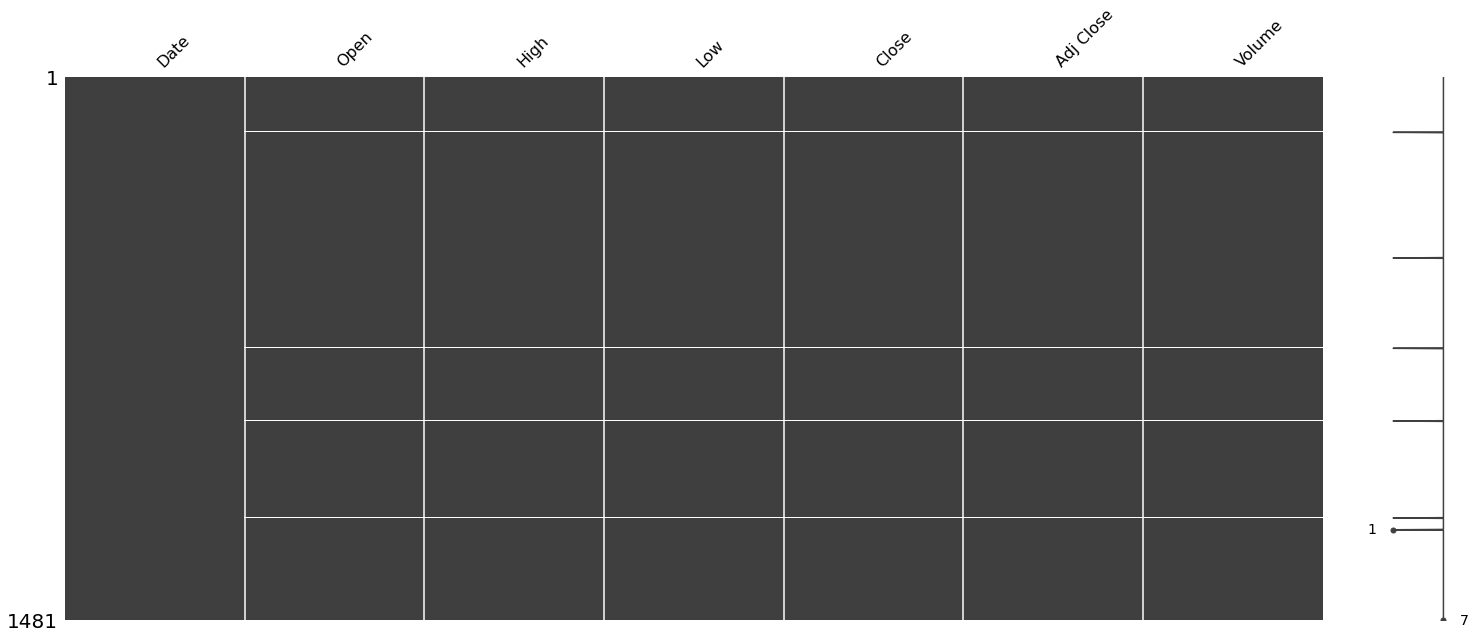

In [6]:
# Visalizing missing values
msno.matrix(df)

### Key Take-Aways
    1. There are 7 given features.
    2. All features are numerical type.
    3. There are 1481 entries in the dataset.
    4. 6 values are missing from each column in the dataset.

In [7]:
# Droping the null value rows from the dataset
df.dropna(inplace = True)

#checking for null values
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

<AxesSubplot:>

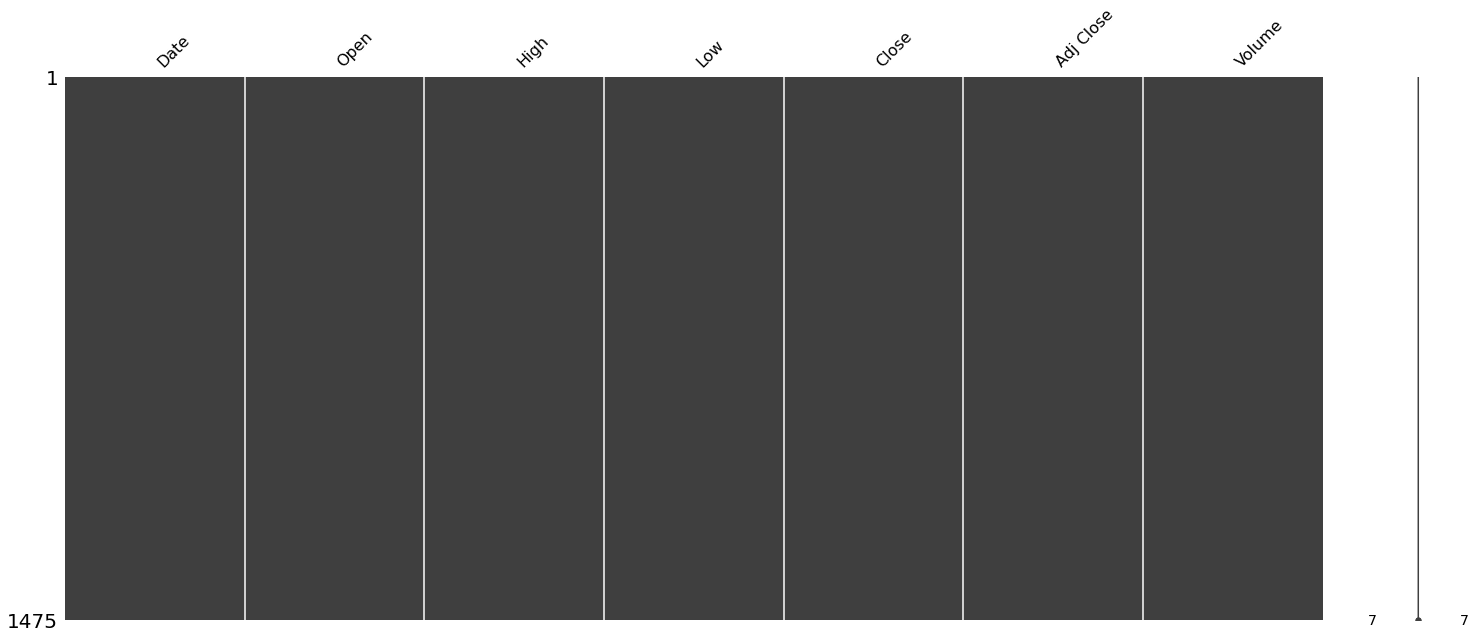

In [8]:
# Visalizing missing values
msno.matrix(df)

In [9]:
# Print basic statistical details about dataset
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1475.000000,1475.000000,1475.000000,1475.000000,1475.000000,1.475000e+03
mean,11190.630103,11243.279798,11114.862019,11180.224847,11180.224847,3.672148e+05
std,2605.404423,2613.649325,2588.183872,2602.005796,2602.005796,2.277599e+05
min,7023.649902,7034.200195,6825.799805,6970.600098,6970.600098,0.000000e+00
25%,9362.950195,9404.100098,9290.100097,9315.899902,9315.899902,1.956000e+05
50%,10781.849609,10816.349609,10718.750000,10769.150391,10769.150391,2.906000e+05
75%,11925.699707,11968.899903,11847.475097,11914.125000,11914.125000,5.092500e+05
max,18602.349609,18604.449219,18445.300781,18477.050781,18477.050781,1.811000e+06


In [10]:
# Checking if the "close" and "Adj Close" values are same
df['Close'].equals(df['Adj Close']) 

True

### Key Take-Aways
    1. "Close" and "Adj Close" columns are same
    2. Missing value rows have been removed from the dataset

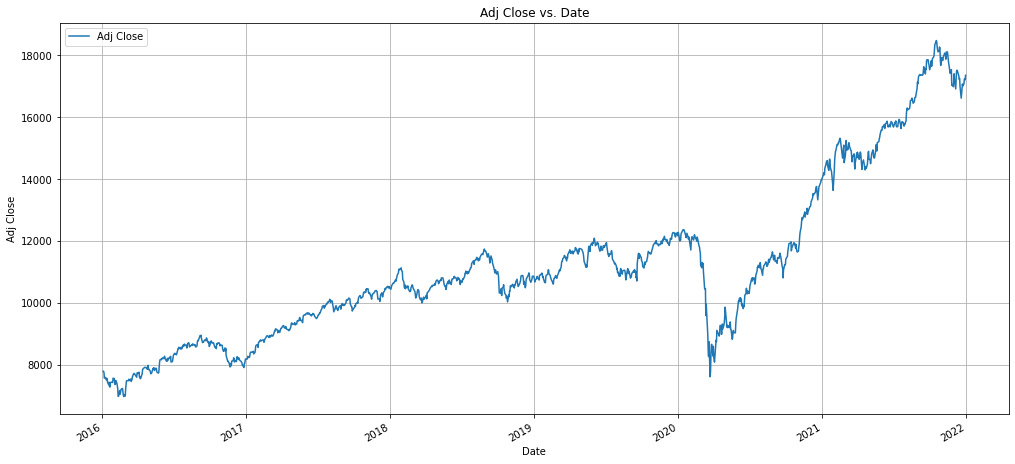

<Figure size 432x288 with 0 Axes>

In [11]:
# Visualize the historical view of the Adjusted closing price
fig = plt.figure(figsize=(17,8))
ax = fig.add_subplot(111)
ax.set(title = 'Adj Close vs. Date', xlabel = 'Date', ylabel = 'Adj Close')
ax.grid()
plt.plot(pd.to_datetime(df['Date']), df['Adj Close'], label='Adj Close')
plt.gcf().autofmt_xdate()
plt.legend()
plt.show()
plt.tight_layout()

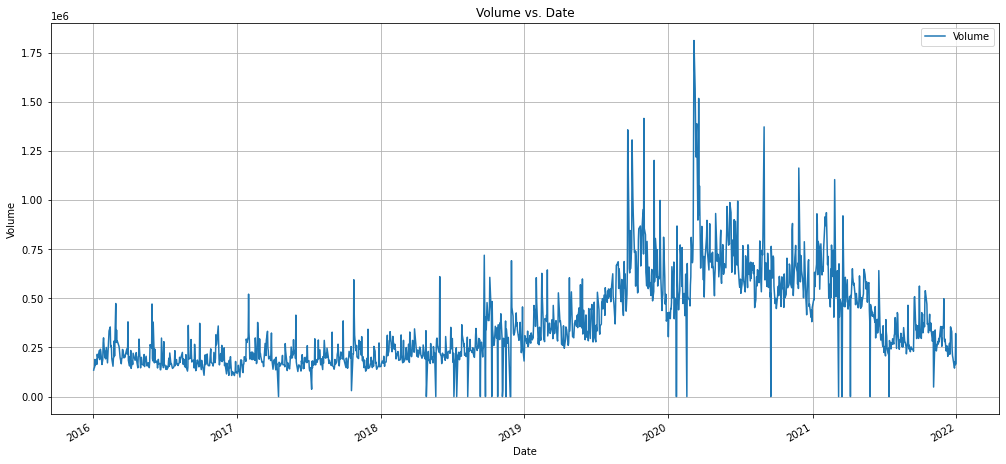

<Figure size 432x288 with 0 Axes>

In [12]:
# Visualize the historical view of traded volume
fig = plt.figure(figsize=(17,8))
ax = fig.add_subplot(111)
ax.set(title = 'Volume vs. Date', xlabel = 'Date', ylabel = 'Volume')
ax.grid()
plt.plot(pd.to_datetime(df['Date']), df['Volume'], label='Volume')
plt.gcf().autofmt_xdate()
plt.legend()
plt.show()
plt.tight_layout()

In [13]:
# Copying the dataset
df_wip = df

# Calculating the returns
df_wip['Returns'] = df_wip['Adj Close'].pct_change()*100

# Print and check
df_wip

,Date,Open,High,Low,Close,Adj Close,Volume,Returns
0,2016-01-04,7924.549805,7937.549805,7781.100098,7791.299805,7791.299805,134700.0,NaN
1,2016-01-05,7828.399902,7831.200195,7763.250000,7784.649902,7784.649902,145200.0,-0.085350
2,2016-01-06,7788.049805,7800.950195,7721.200195,7741.000000,7741.000000,147100.0,-0.560718
3,2016-01-07,7673.350098,7674.950195,7556.600098,7568.299805,7568.299805,188900.0,-2.230980
4,2016-01-08,7611.649902,7634.100098,7581.049805,7601.350098,7601.350098,157400.0,0.436694
...,...,...,...,...,...,...,...,...
1476,2021-12-27,16937.750000,17112.050781,16833.199219,17086.250000,17086.250000,144800.0,0.485187
1477,2021-12-28,17177.599609,17250.250000,17161.150391,17233.250000,17233.250000,176000.0,0.860341
1478,2021-12-29,17220.099609,17285.949219,17176.650391,17213.599609,17213.599609,161700.0,-0.114026
1479,2021-12-30,17201.449219,17264.050781,17146.349609,17203.949219,17203.949219,320800.0,-0.056063


In [14]:
# Defining the time frames for calculating moving averages
ma_day = [10, 20, 50]

# Calculate moving average for mentioned time frames
for ma in ma_day:
    column_name = f"MA for {ma} days"
    df_wip[column_name] = df_wip['Adj Close'].rolling(ma).mean()

# Print and check the updated dataset with moving averages
df_wip

,Date,Open,High,Low,Close,Adj Close,Volume,Returns,MA for 10 days,MA for 20 days,MA for 50 days
0,2016-01-04,7924.549805,7937.549805,7781.100098,7791.299805,7791.299805,134700.0,NaN,NaN,NaN,NaN
1,2016-01-05,7828.399902,7831.200195,7763.250000,7784.649902,7784.649902,145200.0,-0.085350,NaN,NaN,NaN
2,2016-01-06,7788.049805,7800.950195,7721.200195,7741.000000,7741.000000,147100.0,-0.560718,NaN,NaN,NaN
3,2016-01-07,7673.350098,7674.950195,7556.600098,7568.299805,7568.299805,188900.0,-2.230980,NaN,NaN,NaN
4,2016-01-08,7611.649902,7634.100098,7581.049805,7601.350098,7601.350098,157400.0,0.436694,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1476,2021-12-27,16937.750000,17112.050781,16833.199219,17086.250000,17086.250000,144800.0,0.485187,17028.299805,17149.327344,17606.175938
1477,2021-12-28,17177.599609,17250.250000,17161.150391,17233.250000,17233.250000,176000.0,0.860341,17019.134766,17161.829883,17584.069922
1478,2021-12-29,17220.099609,17285.949219,17176.650391,17213.599609,17213.599609,161700.0,-0.114026,17018.354687,17164.164844,17558.800898
1479,2021-12-30,17201.449219,17264.050781,17146.349609,17203.949219,17203.949219,320800.0,-0.056063,17013.909570,17154.279785,17534.504883


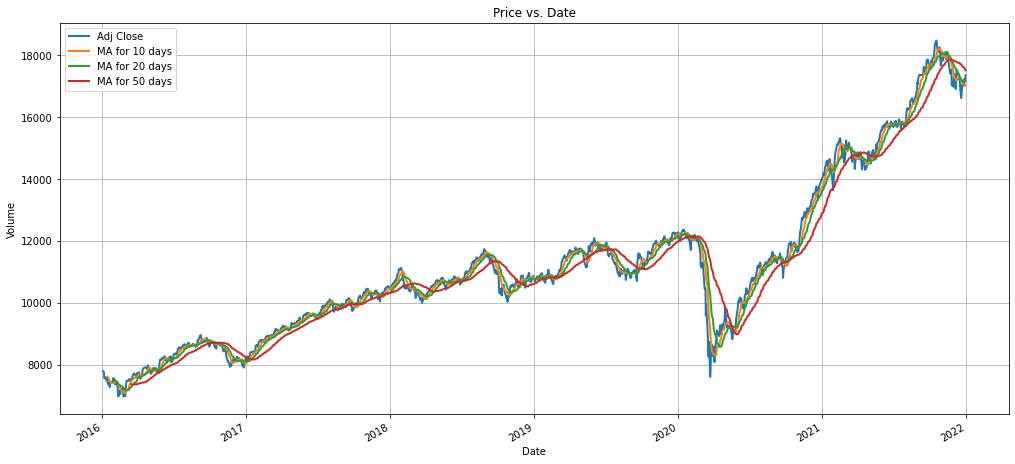

<Figure size 432x288 with 0 Axes>

In [15]:
# Defining the linewidth for the plot
line_width = 2.0

# Visualize the collected data
fig = plt.figure(figsize=(17,8))
ax = fig.add_subplot(111)
ax.set(title = 'Price vs. Date', xlabel = 'Date', ylabel = 'Volume')
ax.grid()
plt.plot(pd.to_datetime(df_wip['Date']), df_wip['Adj Close'], linewidth=line_width, label='Adj Close')
plt.plot(pd.to_datetime(df_wip['Date']), df_wip['MA for 10 days'], linewidth=line_width, label='MA for 10 days')
plt.plot(pd.to_datetime(df_wip['Date']), df_wip['MA for 20 days'], linewidth=line_width, label='MA for 20 days')
plt.plot(pd.to_datetime(df_wip['Date']), df_wip['MA for 50 days'], linewidth=line_width, label='MA for 50 days')
plt.gcf().autofmt_xdate()
plt.legend()
plt.show()
plt.tight_layout()

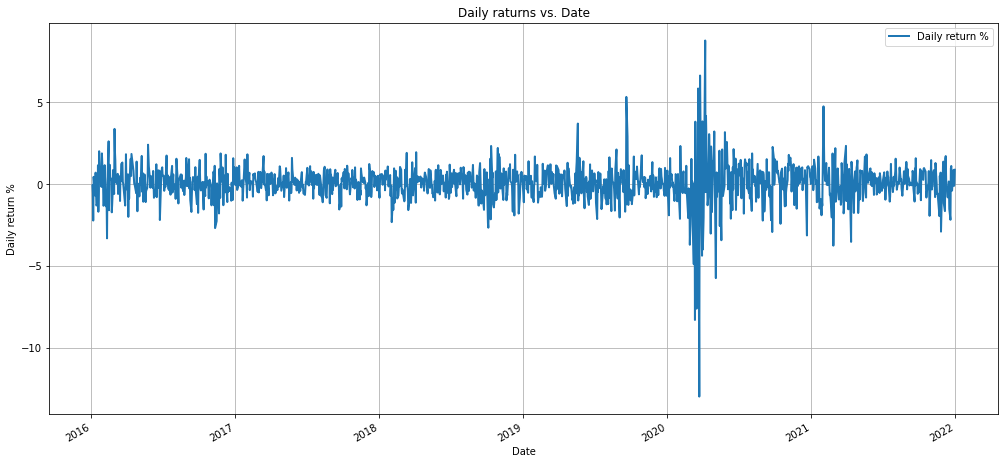

<Figure size 432x288 with 0 Axes>

In [16]:
# Visualize the daily returns
fig = plt.figure(figsize=(17,8))
ax = fig.add_subplot(111)
ax.set(title = 'Daily raturns vs. Date', xlabel = 'Date', ylabel = 'Daily return %')
ax.grid()
plt.plot(pd.to_datetime(df_wip['Date']), df_wip['Returns'], linewidth=line_width, label='Daily return %')
plt.gcf().autofmt_xdate()
plt.legend()
plt.show()
plt.tight_layout()

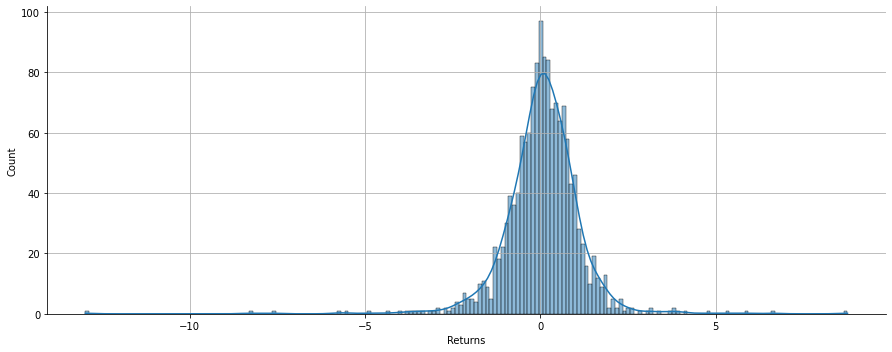

In [17]:
# Plot the distribution of daily returns
sns.displot(data=df_wip, kde=True, x="Returns", kind='hist', height=5, aspect=2.5, bins=200)
plt.grid()

<AxesSubplot:xlabel='Returns'>

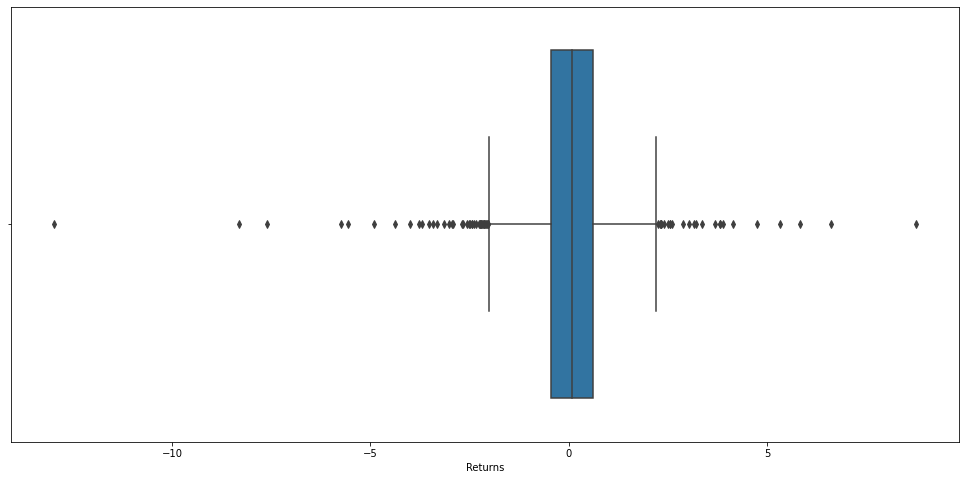

In [18]:
# Plot boxplot for the daily returns
fig = plt.figure(figsize=(17,8))
ax = fig.add_subplot(111)
sns.boxplot(df_wip['Returns'])

In [19]:
Q1 = df_wip['Returns'].quantile(0.25)
print("Q1 : ",Q1)
Q3 = df_wip['Returns'].quantile(0.75)
print("Q3 : ",Q3)

Q1 :  -0.4349161269735946
Q3 :  0.6232176288546998


### Key Take-Aways
    1. It can be seen that majority of daily returns are seen between -0.43% and 0.62%

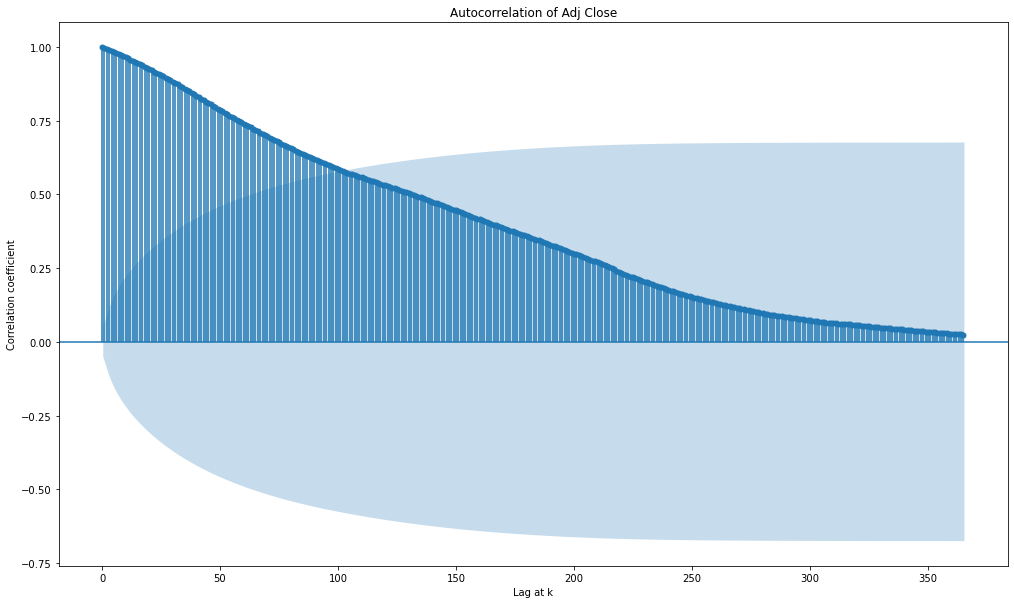

In [20]:
# Setting the plot size
plt.rcParams["figure.figsize"] = 17,10

# # Plotting autocorrelation for Adj Close
fig = tsaplots.plot_acf(df_wip["Adj Close"], lags=365)

plt.title("Autocorrelation of Adj Close")
plt.xlabel("Lag at k")
plt.ylabel("Correlation coefficient")
plt.show()

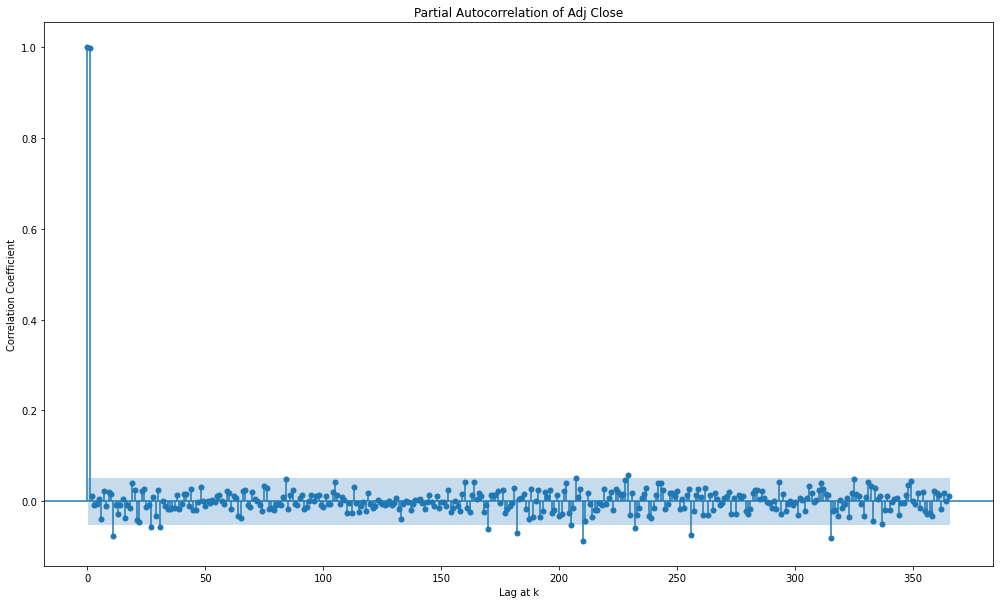

In [21]:
# Setting the plot size
plt.rcParams["figure.figsize"] = 17, 10

# Plotting partial autocorrelation for Adj Close
fig = tsaplots.plot_pacf(df_wip["Adj Close"], lags=365)
plt.title("Partial Autocorrelation of Adj Close")
plt.xlabel("Lag at k")
plt.ylabel("Correlation Coefficient")
plt.show();

In [22]:
# Creating a dataframe with "Adj Close" with "Date" as index to use in decomposition
df_wip2 = pd.DataFrame(df_wip['Adj Close'])
df_wip2['Date'] = df_wip['Date']
df_wip2['Date']= pd.to_datetime(df_wip2['Date'])
df_wip2 = df_wip2.set_index('Date')

# Print and check
df_wip2

,Adj Close
Date,
2016-01-04,7791.299805
2016-01-05,7784.649902
2016-01-06,7741.000000
2016-01-07,7568.299805
2016-01-08,7601.350098
...,...
2021-12-27,17086.250000
2021-12-28,17233.250000
2021-12-29,17213.599609


<AxesSubplot:xlabel='Date', ylabel='Residual'>

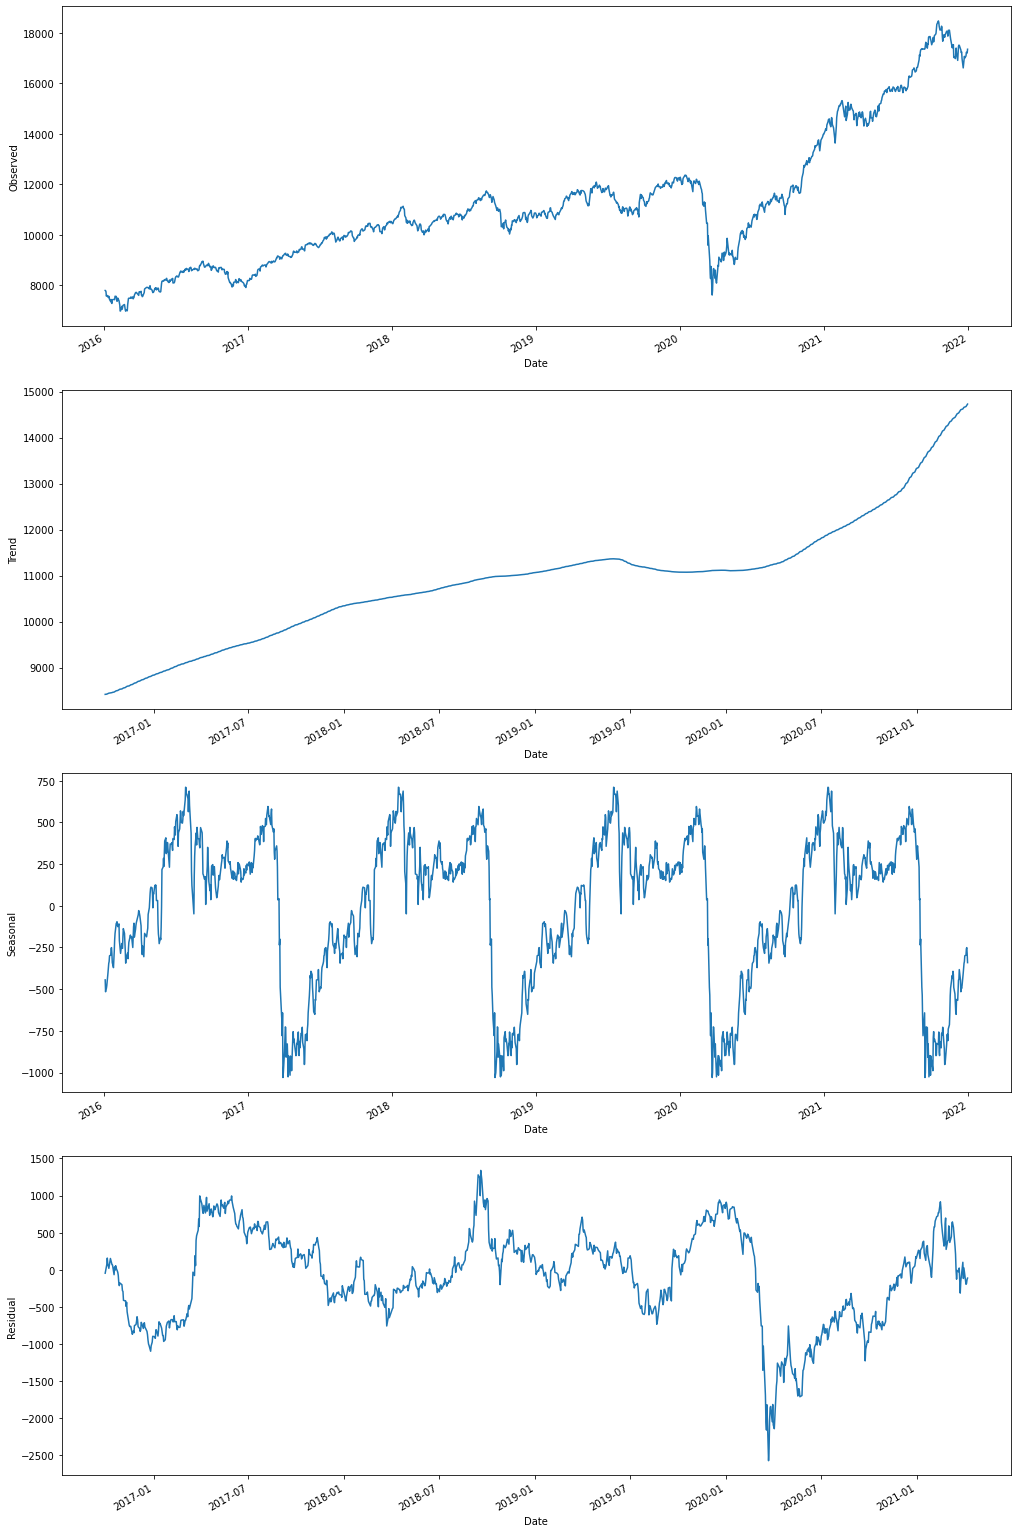

In [23]:
# Decomposing the time series as Trend, Seasonality & Residual Noise
# The frequncy is annual
decomposed_data = sm.tsa.seasonal_decompose(df_wip2,freq=365) 

# Plotting the decomposed data
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(17, 30))
decomposed_data.observed.plot(ax=ax1, ylabel="Observed")
decomposed_data.trend.plot(ax=ax2, ylabel="Trend")
decomposed_data.seasonal.plot(ax=ax3, ylabel="Seasonal")
decomposed_data.resid.plot(ax=ax4, ylabel="Residual")

Text(0, 0.5, 'Risk')

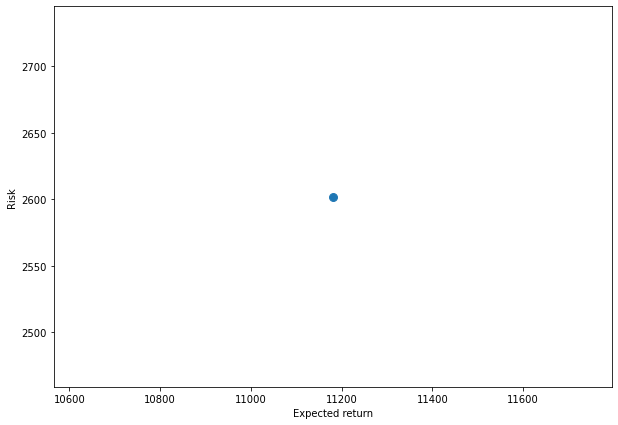

In [24]:
# Calculate risk by comparing the expected return with the standard deviation of the daily returns
plt.figure(figsize=(10, 7))
plt.scatter(df_wip["Adj Close"].mean(), df_wip["Adj Close"].std(), np.pi * 20)
plt.xlabel('Expected return')
plt.ylabel('Risk')

## Multivariate LSTM

In [25]:
# Extracting the required features
df_input = df_wip[['Adj Close', 'Open', 'High', 'Low', 'Close', 'Volume']]

# Print and check
df_input

,Adj Close,Open,High,Low,Close,Volume
0,7791.299805,7924.549805,7937.549805,7781.100098,7791.299805,134700.0
1,7784.649902,7828.399902,7831.200195,7763.250000,7784.649902,145200.0
2,7741.000000,7788.049805,7800.950195,7721.200195,7741.000000,147100.0
3,7568.299805,7673.350098,7674.950195,7556.600098,7568.299805,188900.0
4,7601.350098,7611.649902,7634.100098,7581.049805,7601.350098,157400.0
...,...,...,...,...,...,...
1476,17086.250000,16937.750000,17112.050781,16833.199219,17086.250000,144800.0
1477,17233.250000,17177.599609,17250.250000,17161.150391,17233.250000,176000.0
1478,17213.599609,17220.099609,17285.949219,17176.650391,17213.599609,161700.0
1479,17203.949219,17201.449219,17264.050781,17146.349609,17203.949219,320800.0


In [26]:
# Adding a column for predictions before scaling
#df_input_wip=df_input
#df_input_wip.insert (0, "Preds", np.nan)
#df_input_wip

In [27]:
# Initializing the MinMaxScaler object with limits 0 to 1
scaler = MinMaxScaler(feature_range=(0,1))

# Scaling the data between 0 and 1
scaled_data = scaler.fit_transform(df_input)

# Print and check
scaled_data

array([[0.07132518, 0.07780666, 0.07807521, 0.08221526, 0.07132518,
        0.0743788 ],
       [0.07074726, 0.06950262, 0.06888356, 0.08067904, 0.07074726,
        0.0801767 ],
       [0.06695374, 0.06601777, 0.0662691 , 0.07706014, 0.06695374,
        0.08122584],
       ...,
       [0.89019627, 0.88062131, 0.88604394, 0.89081714, 0.89019627,
        0.08928769],
       [0.88935758, 0.87901056, 0.88415129, 0.88820938, 0.88935758,
        0.1771397 ],
       [0.90240257, 0.88272866, 0.89597039, 0.89614005, 0.90240257,
        0.09221425]])

In [28]:
# Extracting the required features from the scaled data
features = scaled_data[:,0:]

# Extracting target from the scaled data
target = scaled_data[:,1]

In [29]:
# Using train test split to split data
x_train, x_val, y_train, y_val = train_test_split(features, target, test_size=0.3, random_state=100, shuffle=False)

# Print the shape of train set
print("Shape of x_train : ", x_train.shape)
print("Shape of y_train : ", y_train.shape)

# Print the shape of validation set
print("Shape of x_test : ", x_val.shape)
print("Shape of y_test : ", y_val.shape)

Shape of x_train :  (1032, 6)
Shape of y_train :  (1032,)
Shape of x_test :  (443, 6)
Shape of y_test :  (443,)


In [30]:
# Defining the step size
time_step=100
num_features=df_input.shape[1]

# Generating train and validation datasets
train_generator = TimeseriesGenerator(x_train, y_train, length=time_step, sampling_rate=1, batch_size=32)
val_generator = TimeseriesGenerator(x_val, y_val, length=time_step, sampling_rate=1, batch_size=32)

In [31]:
# Building LSTM model
model=Sequential()
model.add(LSTM(128,return_sequences=True,input_shape=(time_step, num_features)))
model.add(LSTM(64,return_sequences=True))
model.add(LSTM(25))
model.add(Dense(1))

# Printing model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 128)          69120     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 64)           49408     
_________________________________________________________________
lstm_2 (LSTM)                (None, 25)                9000      
_________________________________________________________________
dense (Dense)                (None, 1)                 26        
Total params: 127,554
Trainable params: 127,554
Non-trainable params: 0
_________________________________________________________________


Epoch 1/25
30/30 [==============================] - 12s 187ms/step - loss: 0.0028 - mean_absolute_error: 0.0404 - val_loss: 0.0500 - val_mean_absolute_error: 0.2013
Epoch 2/25
30/30 [==============================] - 4s 148ms/step - loss: 0.0035 - mean_absolute_error: 0.0484 - val_loss: 0.0266 - val_mean_absolute_error: 0.1380
Epoch 3/25
30/30 [==============================] - 5s 154ms/step - loss: 0.0049 - mean_absolute_error: 0.0607 - val_loss: 0.0204 - val_mean_absolute_error: 0.1198
Epoch 4/25
30/30 [==============================] - 4s 149ms/step - loss: 0.0037 - mean_absolute_error: 0.0527 - val_loss: 0.0232 - val_mean_absolute_error: 0.1320
Epoch 5/25
30/30 [==============================] - 5s 160ms/step - loss: 0.0019 - mean_absolute_error: 0.0367 - val_loss: 0.0154 - val_mean_absolute_error: 0.1050
Epoch 6/25
30/30 [==============================] - 5s 163ms/step - loss: 0.0013 - mean_absolute_error: 0.0295 - val_loss: 0.0072 - val_mean_absolute_error: 0.0683
Epoch 7/25
30/3

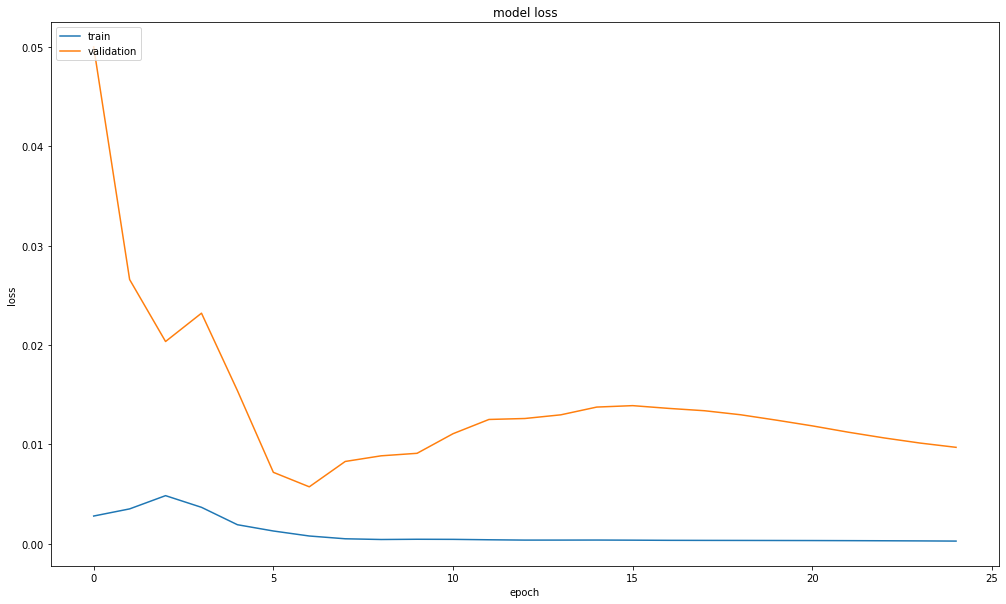

In [32]:
# Compiling the LSTM model
model.compile(optimizer='adam', loss='mean_squared_error', metrics='mean_absolute_error')

# Training the model
history1 = model.fit_generator(train_generator, validation_data=val_generator, shuffle=False, epochs=25, verbose=1)

# Plot history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [33]:
# Generate predictions
train_predictions_scaled = model.predict_generator(train_generator)
val_predictions_scaled = model.predict_generator(val_generator)

# Generating new dataset with predictions
df_train_preds = pd.concat([pd.DataFrame(train_predictions_scaled), pd.DataFrame(x_train[:,1:][time_step:])], axis=1)
df_val_preds = pd.concat([pd.DataFrame(val_predictions_scaled), pd.DataFrame(x_val[:,1:][time_step:])], axis=1)

In [34]:
# Reversing the scaling done on the dataset
train_data = scaler.inverse_transform(df_train_preds)
val_data = scaler.inverse_transform(df_val_preds)

print("Shape of train predictions : ", train_data[:,0].shape)
print("Shape of validation predictions : ", val_data[:,0].shape)

Shape of train predictions :  (932,)
Shape of validation predictions :  (343,)


In [35]:
# Create a dataset for plotting results
df_plot = df_wip[['Date', 'Adj Close']]
df_plot

,Date,Adj Close
0,2016-01-04,7791.299805
1,2016-01-05,7784.649902
2,2016-01-06,7741.000000
3,2016-01-07,7568.299805
4,2016-01-08,7601.350098
...,...,...
1476,2021-12-27,17086.250000
1477,2021-12-28,17233.250000
1478,2021-12-29,17213.599609
1479,2021-12-30,17203.949219


In [36]:
# Creating a column for train preds
df_plot["train_preds"] = np.nan

# Updating the dataset with train predictions
df_plot["train_preds"][time_step:x_train.shape[0]] = train_data[:,0]

# Print and check
df_plot

,Date,Adj Close,train_preds
0,2016-01-04,7791.299805,NaN
1,2016-01-05,7784.649902,NaN
2,2016-01-06,7741.000000,NaN
3,2016-01-07,7568.299805,NaN
4,2016-01-08,7601.350098,NaN
...,...,...,...
1476,2021-12-27,17086.250000,NaN
1477,2021-12-28,17233.250000,NaN
1478,2021-12-29,17213.599609,NaN
1479,2021-12-30,17203.949219,NaN


In [37]:
# Creating a column for train preds
df_plot["val_preds"] = np.nan

# Updating the dataset with train predictions
df_plot["val_preds"][x_train.shape[0]+time_step:] = val_data[:,0]

# Print and check
df_plot

,Date,Adj Close,train_preds,val_preds
0,2016-01-04,7791.299805,NaN,NaN
1,2016-01-05,7784.649902,NaN,NaN
2,2016-01-06,7741.000000,NaN,NaN
3,2016-01-07,7568.299805,NaN,NaN
4,2016-01-08,7601.350098,NaN,NaN
...,...,...,...,...
1476,2021-12-27,17086.250000,NaN,15305.693784
1477,2021-12-28,17233.250000,NaN,15317.768646
1478,2021-12-29,17213.599609,NaN,15345.811872
1479,2021-12-30,17203.949219,NaN,15381.562544


In [38]:
# Define function to get the metrics
def calculate_metrics(y_true, y_pred):
    MSE = math.sqrt(mean_squared_error(y_true, y_pred))
    R2 = r2_score(y_true, y_pred)
    MAPE = mean_absolute_percentage_error(y_true, y_pred)
    
    print("MSE : ", MSE)
    print("R2 Score : ", R2)
    print("MAPE : ", MAPE)
    
    print()
    return [MSE, R2, MAPE]

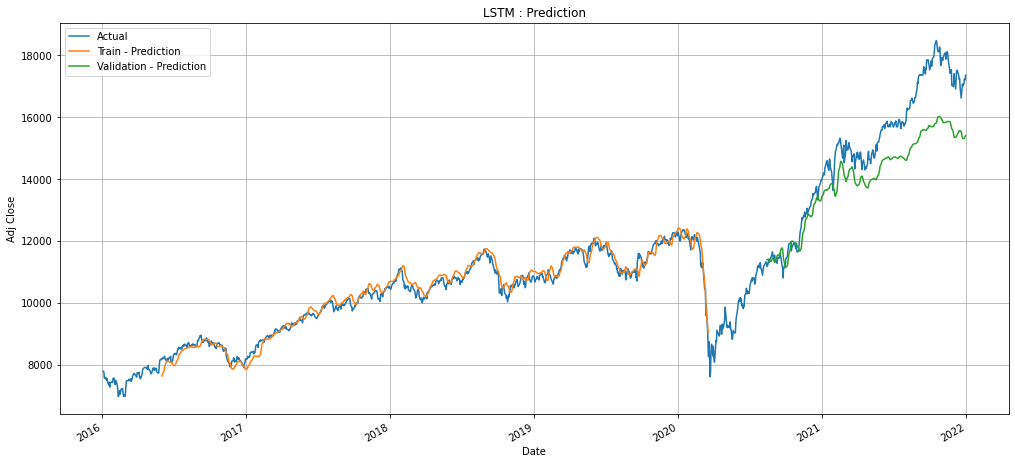

<Figure size 1224x720 with 0 Axes>

In [39]:
# Visualize the predictions
fig = plt.figure(figsize=(17,8))
ax = fig.add_subplot(111)
ax.set(title = 'LSTM : Prediction', xlabel = 'Date', ylabel = 'Adj Close')
ax.grid()
plt.plot(pd.to_datetime(df_plot['Date']), df_plot['Adj Close'], label='Actual')
plt.plot(pd.to_datetime(df_plot['Date']), df_plot['train_preds'], label='Train - Prediction')
plt.plot(pd.to_datetime(df_plot['Date']), df_plot['val_preds'], label='Validation - Prediction')
plt.gcf().autofmt_xdate()
plt.legend()
plt.show()
plt.tight_layout()

In [40]:
# Calculating training metrics
print("Training Metrics:")
df_train_metrics=pd.DataFrame(calculate_metrics(df_plot["Adj Close"][time_step:x_train.shape[0]], train_data[:,0]), columns=['Multivariate'], index =['MSE', 'R2', 'MAPE',])

# Calculating validation metrics
print("Validation Metrics:")
df_val_metrics=pd.DataFrame(calculate_metrics(df_plot["Adj Close"][x_train.shape[0]+time_step:], val_data[:,0]), columns=['Multivariate'], index =['MSE', 'R2', 'MAPE',])

Training Metrics:
MSE :  203.30875303994353
R2 Score :  0.9707134233557448
MAPE :  0.015360072478081199

Validation Metrics:
MSE :  1213.667815174283
R2 Score :  0.6623672240583358
MAPE :  0.06250034207720204



## Univariate LSTM, model1, time_step=100

In [41]:
# Extracting the required features
df_input = df_wip[['Adj Close']]

# Print and check
df_input

,Adj Close
0,7791.299805
1,7784.649902
2,7741.000000
3,7568.299805
4,7601.350098
...,...
1476,17086.250000
1477,17233.250000
1478,17213.599609
1479,17203.949219


In [42]:
# Initializing the MinMaxScaler object with limits 0 to 1
scaler = MinMaxScaler(feature_range=(0,1))

# Scaling the data between 0 and 1
scaled_data = scaler.fit_transform(df_input)

# Extracting the required features from the scaled data
features = scaled_data

# Extracting target from the scaled data
target = scaled_data[:,0]

# Using train test split to split data
x_train, x_val, y_train, y_val = train_test_split(features, target, test_size=0.3, random_state=100, shuffle=False)

# Defining the step size
time_step=100
num_features=df_input.shape[1]

# Generating train and validation datasets
train_generator = TimeseriesGenerator(x_train, y_train, length=time_step, sampling_rate=1, batch_size=32)
val_generator = TimeseriesGenerator(x_val, y_val, length=time_step, sampling_rate=1, batch_size=32)

# Building LSTM model
model1=Sequential()
model1.add(LSTM(128,return_sequences=True,input_shape=(time_step, num_features)))
model1.add(LSTM(64,return_sequences=True))
model1.add(LSTM(25))
model1.add(Dense(1))
model1.compile(loss='mean_squared_error', optimizer='adam')

# Printing model summary
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 128)          66560     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 64)           49408     
_________________________________________________________________
lstm_5 (LSTM)                (None, 25)                9000      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 124,994
Trainable params: 124,994
Non-trainable params: 0
_________________________________________________________________


Epoch 1/25
30/30 [==============================] - 9s 179ms/step - loss: 0.0025 - mean_absolute_error: 0.0353 - val_loss: 0.0444 - val_mean_absolute_error: 0.1911
Epoch 2/25
30/30 [==============================] - 4s 147ms/step - loss: 0.0062 - mean_absolute_error: 0.0650 - val_loss: 0.0518 - val_mean_absolute_error: 0.1973
Epoch 3/25
30/30 [==============================] - 5s 153ms/step - loss: 0.0071 - mean_absolute_error: 0.0729 - val_loss: 0.0696 - val_mean_absolute_error: 0.2346
Epoch 4/25
30/30 [==============================] - 5s 157ms/step - loss: 0.0059 - mean_absolute_error: 0.0649 - val_loss: 0.0709 - val_mean_absolute_error: 0.2361
Epoch 5/25
30/30 [==============================] - 5s 155ms/step - loss: 0.0063 - mean_absolute_error: 0.0658 - val_loss: 0.0699 - val_mean_absolute_error: 0.2314
Epoch 6/25
30/30 [==============================] - 4s 150ms/step - loss: 0.0070 - mean_absolute_error: 0.0693 - val_loss: 0.0781 - val_mean_absolute_error: 0.2450
Epoch 7/25
30/30

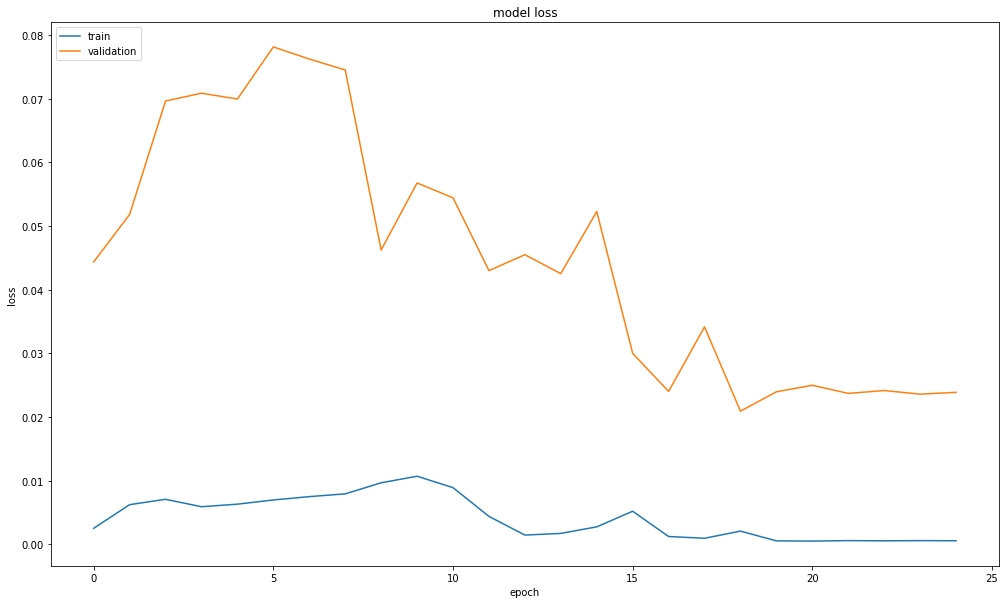

In [43]:
# Compiling the LSTM model
model1.compile(optimizer='adam', loss='mean_squared_error', metrics='mean_absolute_error')

# Training the model
history1 = model1.fit_generator(train_generator, validation_data=val_generator, shuffle=False, epochs=25, verbose=1)

# Plot history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [44]:
# Generate predictions
train_predictions_scaled = model1.predict_generator(train_generator)
val_predictions_scaled = model1.predict_generator(val_generator)

# Generating new dataset with predictions
df_train_preds = pd.concat([pd.DataFrame(train_predictions_scaled), pd.DataFrame(x_train[:,0:][time_step:])], axis=1)
df_val_preds = pd.concat([pd.DataFrame(val_predictions_scaled), pd.DataFrame(x_val[:,0:][time_step:])], axis=1)

# Reversing the scaling done on the dataset
train_data = scaler.inverse_transform(df_train_preds)
val_data = scaler.inverse_transform(df_val_preds)

# Create a dataset for plotting results
df_plot = df_wip[['Date', 'Adj Close']]

# Creating a column for train preds
df_plot["train_preds"] = np.nan

# Updating the dataset with train predictions
df_plot["train_preds"][time_step:x_train.shape[0]] = train_data[:,0]

# Creating a column for train preds
df_plot["val_preds"] = np.nan

# Updating the dataset with train predictions
df_plot["val_preds"][x_train.shape[0]+time_step:] = val_data[:,0]

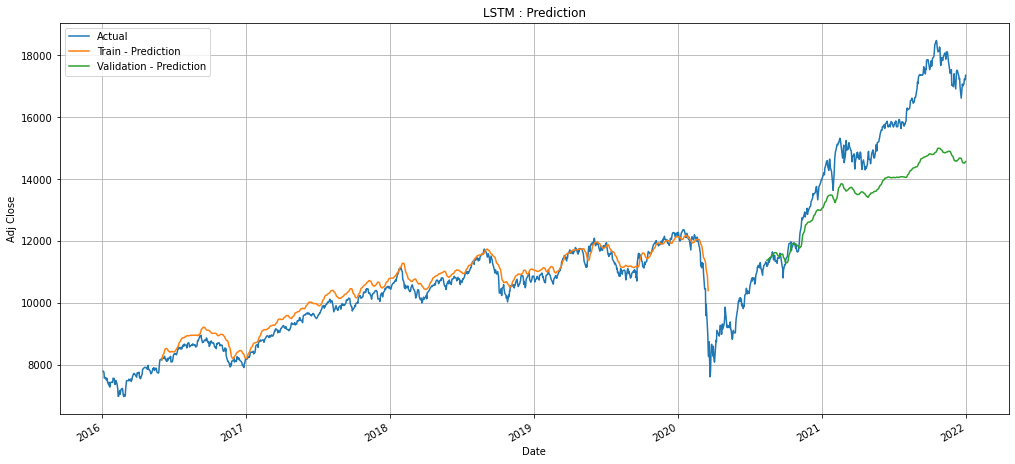

<Figure size 1224x720 with 0 Axes>

In [45]:
# Visualize the predictions
fig = plt.figure(figsize=(17,8))
ax = fig.add_subplot(111)
ax.set(title = 'LSTM : Prediction', xlabel = 'Date', ylabel = 'Adj Close')
ax.grid()
plt.plot(pd.to_datetime(df_plot['Date']), df_plot['Adj Close'], label='Actual')
plt.plot(pd.to_datetime(df_plot['Date']), df_plot['train_preds'], label='Train - Prediction')
plt.plot(pd.to_datetime(df_plot['Date']), df_plot['val_preds'], label='Validation - Prediction')
plt.gcf().autofmt_xdate()
plt.legend()
plt.show()
plt.tight_layout()

In [46]:
# Calculating training metrics
print("Training Metrics:")
df_train_metrics["Univariate_100"]=calculate_metrics(df_plot["Adj Close"][time_step:x_train.shape[0]], train_data[:,0])

# Calculating validation metrics
print("Validation Metrics:")
df_val_metrics["Univariate_100"]=calculate_metrics(df_plot["Adj Close"][x_train.shape[0]+time_step:], val_data[:,0])

Training Metrics:
MSE :  308.2610971534914
R2 Score :  0.9326722818918998
MAPE :  0.025258528706913242

Validation Metrics:
MSE :  1778.067775846571
R2 Score :  0.27532788274292896
MAPE :  0.09206667481569568



## Univariate LSTM, model2, time_step=100

In [47]:
# Extracting the required features
df_input = df_wip[['Adj Close']]

# Print and check
df_input

,Adj Close
0,7791.299805
1,7784.649902
2,7741.000000
3,7568.299805
4,7601.350098
...,...
1476,17086.250000
1477,17233.250000
1478,17213.599609
1479,17203.949219


In [48]:
# Initializing the MinMaxScaler object with limits 0 to 1
scaler = MinMaxScaler(feature_range=(0,1))

# Scaling the data between 0 and 1
scaled_data = scaler.fit_transform(df_input)

# Extracting the required features from the scaled data
features = scaled_data

# Extracting target from the scaled data
target = scaled_data[:,0]

# Using train test split to split data
x_train, x_val, y_train, y_val = train_test_split(features, target, test_size=0.3, random_state=100, shuffle=False)

# Defining the step size
time_step=100
num_features=df_input.shape[1]

# Generating train and validation datasets
train_generator = TimeseriesGenerator(x_train, y_train, length=time_step, sampling_rate=1, batch_size=32)
val_generator = TimeseriesGenerator(x_val, y_val, length=time_step, sampling_rate=1, batch_size=32)

# Building LSTM model
model2=Sequential()
model2.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model2.add(LSTM(50,return_sequences=True))
model2.add(LSTM(50))
model2.add(Dense(1))
model2.compile(loss='mean_squared_error',optimizer='adam')

# Printing model summary
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_7 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


Epoch 1/25
30/30 [==============================] - 9s 161ms/step - loss: 0.0023 - mean_absolute_error: 0.0345 - val_loss: 0.0603 - val_mean_absolute_error: 0.2203
Epoch 2/25
30/30 [==============================] - 4s 121ms/step - loss: 0.0077 - mean_absolute_error: 0.0732 - val_loss: 0.0690 - val_mean_absolute_error: 0.2294
Epoch 3/25
30/30 [==============================] - 3s 103ms/step - loss: 0.0081 - mean_absolute_error: 0.0759 - val_loss: 0.0634 - val_mean_absolute_error: 0.2189
Epoch 4/25
30/30 [==============================] - 3s 98ms/step - loss: 0.0090 - mean_absolute_error: 0.0795 - val_loss: 0.0734 - val_mean_absolute_error: 0.2370
Epoch 5/25
30/30 [==============================] - 3s 104ms/step - loss: 0.0086 - mean_absolute_error: 0.0781 - val_loss: 0.0597 - val_mean_absolute_error: 0.2095
Epoch 6/25
30/30 [==============================] - 3s 110ms/step - loss: 0.0122 - mean_absolute_error: 0.0972 - val_loss: 0.0466 - val_mean_absolute_error: 0.1852
Epoch 7/25
30/30 

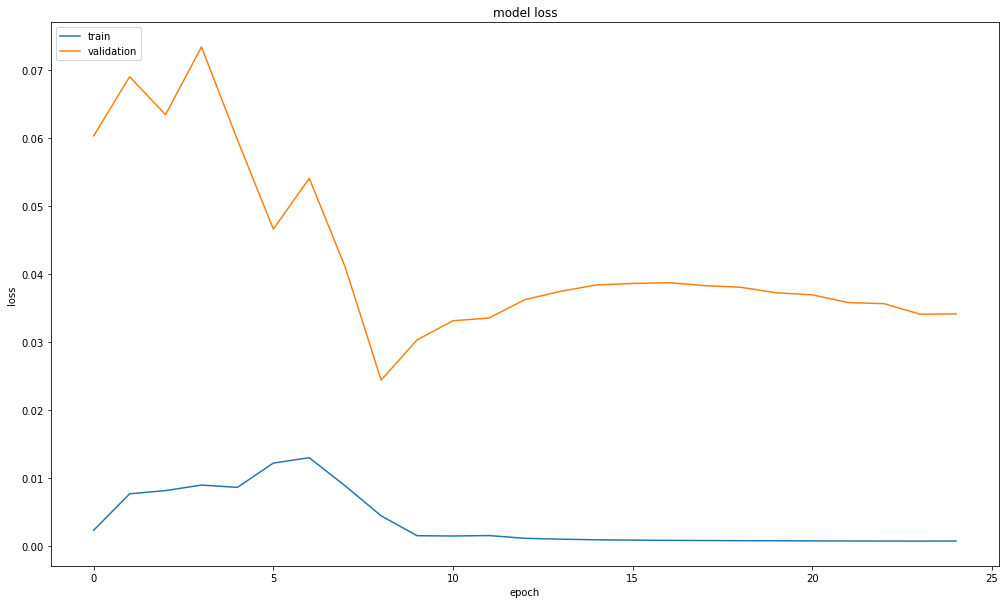

In [49]:
# Compiling the LSTM model
model2.compile(optimizer='adam', loss='mean_squared_error', metrics='mean_absolute_error')

# Training the model
history1 = model2.fit_generator(train_generator, validation_data=val_generator, shuffle=False, epochs=25, verbose=1)

# Plot history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [50]:
# Generate predictions
train_predictions_scaled = model2.predict_generator(train_generator)
val_predictions_scaled = model2.predict_generator(val_generator)

# Generating new dataset with predictions
df_train_preds = pd.concat([pd.DataFrame(train_predictions_scaled), pd.DataFrame(x_train[:,1:][time_step:])], axis=1)
df_val_preds = pd.concat([pd.DataFrame(val_predictions_scaled), pd.DataFrame(x_val[:,1:][time_step:])], axis=1)

# Reversing the scaling done on the dataset
train_data = scaler.inverse_transform(df_train_preds)
val_data = scaler.inverse_transform(df_val_preds)

# Create a dataset for plotting results
df_plot = df_wip[['Date', 'Adj Close']]

# Creating a column for train preds
df_plot["train_preds"] = np.nan

# Updating the dataset with train predictions
df_plot["train_preds"][time_step:x_train.shape[0]] = train_data[:,0]

# Creating a column for train preds
df_plot["val_preds"] = np.nan

# Updating the dataset with train predictions
df_plot["val_preds"][x_train.shape[0]+time_step:] = val_data[:,0]

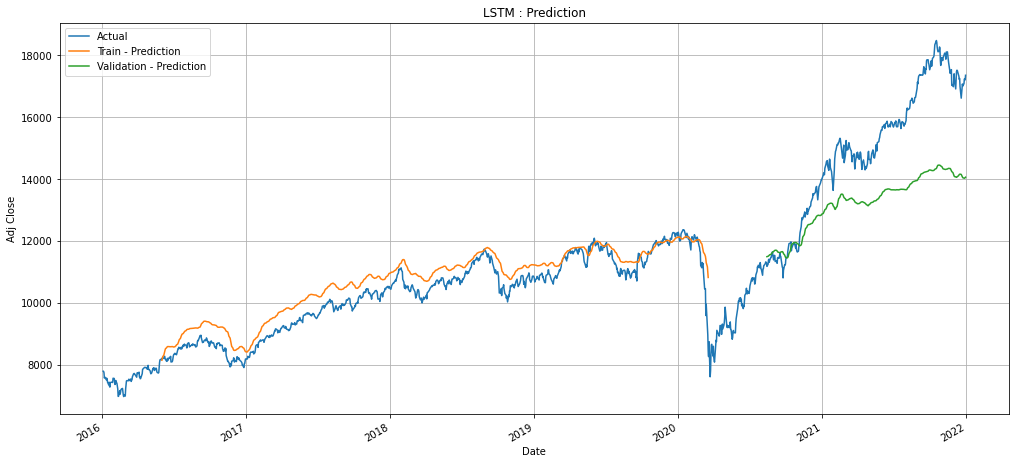

<Figure size 1224x720 with 0 Axes>

In [51]:
# Visualize the predictions
fig = plt.figure(figsize=(17,8))
ax = fig.add_subplot(111)
ax.set(title = 'LSTM : Prediction', xlabel = 'Date', ylabel = 'Adj Close')
ax.grid()
plt.plot(pd.to_datetime(df_plot['Date']), df_plot['Adj Close'], label='Actual')
plt.plot(pd.to_datetime(df_plot['Date']), df_plot['train_preds'], label='Train - Prediction')
plt.plot(pd.to_datetime(df_plot['Date']), df_plot['val_preds'], label='Validation - Prediction')
plt.gcf().autofmt_xdate()
plt.legend()
plt.show()
plt.tight_layout()

In [52]:
# Calculating training metrics
print("Training Metrics:")
df_train_metrics["Univariate_100_model2"]=calculate_metrics(df_plot["Adj Close"][time_step:x_train.shape[0]], train_data[:,0])

# Calculating validation metrics
print("Validation Metrics:")
df_val_metrics["Univariate_100_model2"]=calculate_metrics(df_plot["Adj Close"][x_train.shape[0]+time_step:], val_data[:,0])

Training Metrics:
MSE :  468.473005739892
R2 Score :  0.8445017169467606
MAPE :  0.040977449622563646

Validation Metrics:
MSE :  2125.8308256162363
R2 Score :  -0.035863020954261415
MAPE :  0.11131860591285965



## Univariate LSTM, model3,  time_step=100

In [53]:
# Extracting the required features
df_input = df_wip[['Adj Close']]

# Print and check
df_input

,Adj Close
0,7791.299805
1,7784.649902
2,7741.000000
3,7568.299805
4,7601.350098
...,...
1476,17086.250000
1477,17233.250000
1478,17213.599609
1479,17203.949219


In [54]:
# Initializing the MinMaxScaler object with limits 0 to 1
scaler = MinMaxScaler(feature_range=(0,1))

# Scaling the data between 0 and 1
scaled_data = scaler.fit_transform(df_input)

# Determining the training and testing size by dividing the dataset in 65%-35% split
training_size = int(len(df_wip)*0.65)
test_size = len(df_wip) - training_size

# Splitting the dataset into training and testing
train_data, val_data = scaled_data[0:int(training_size), :], scaled_data[int(training_size):len(scaled_data), :]

# Print and check the shape of train and test 
print("Shape of train : ", train_data.shape)
print("Shape of test : ", val_data.shape)

Shape of train :  (958, 1)
Shape of test :  (517, 1)


In [55]:
# Define a function to process into required format for LSTM 
def create_dataset(dataset, timestep=1):
    dataX, dataY = [], []
    for i in range(len(dataset)- timestep):
        dataX.append(dataset[i:(i+timestep),0])
        dataY.append(dataset[i+timestep,0])
    return np.array(dataX), np.array(dataY)

# Define the timestep to consider
time_step = 100

# Generate test and train splits
x_train, y_train = create_dataset(train_data, time_step)
x_val, y_val = create_dataset(val_data, time_step)

# Print the shape of train set
print("Shape of x_train : ", x_train.shape)
print("Shape of y_train : ", y_train.shape)

# Print the shape of test set
print("Shape of x_test : ", x_val.shape)
print("Shape of y_test : ", y_val.shape)

Shape of x_train :  (858, 100)
Shape of y_train :  (858,)
Shape of x_test :  (417, 100)
Shape of y_test :  (417,)


In [56]:
# Reshape input into shape --> [samples, time steps, features] which is required for LSTM
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
x_val = x_val.reshape(x_val.shape[0],x_val.shape[1] , 1)

# Print the shape of train set
print("Shape of x_train : ", x_train.shape)
print("Shape of y_train : ", y_train.shape)

# Print the shape of test set
print("Shape of x_test : ", x_val.shape)
print("Shape of y_test : ", y_val.shape)

Shape of x_train :  (858, 100, 1)
Shape of y_train :  (858,)
Shape of x_test :  (417, 100, 1)
Shape of y_test :  (417,)


In [57]:
# Building LSTM model
model3=Sequential()
model3.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model3.add(LSTM(64, return_sequences=False))
model3.add(Dense(25))
model3.add(Dense(1))

# Compiling the LSTM model
model3.compile(optimizer='adam', loss='mean_squared_error', metrics='mean_absolute_error')

# Generate model summary
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 100, 128)          66560     
_________________________________________________________________
lstm_10 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dense_3 (Dense)              (None, 25)                1625      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 26        
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
14/14 [==============================] - 5s 216ms/step - loss: 0.0120 - mean_absolute_error: 0.0826 - val_loss: 0.0327 - val_mean_absolute_error: 0.1588
Epoch 2/10
14/14 [==============================] - 2s 165ms/step - loss: 0.0017 - mean_absolute_error: 0.0341 - val_loss: 0.0274 - val_mean_absolute_error: 0.1466
Epoch 3/10
14/14 [==============================] - 2s 164ms/step - loss: 9.2589e-04 - mean_absolute_error: 0.0246 - val_loss: 0.0081 - val_mean_absolute_error: 0.0787
Epoch 4/10
14/14 [==============================] - 2s 166ms/step - loss: 3.6604e-04 - mean_absolute_error: 0.0148 - val_loss: 0.0018 - val_mean_absolute_error: 0.0358
Epoch 5/10
14/14 [==============================] - 2s 165ms/step - loss: 2.6616e-04 - mean_absolute_error: 0.0127 - val_loss: 8.3992e-04 - val_mean_absolute_error: 0.0236
Epoch 6/10
14/14 [==============================] - 2s 167ms/step - loss: 2.4937e-04 - mean_absolute_error: 0.0122 - val_loss: 8.4973e-04 - val_mean_absolute_error:

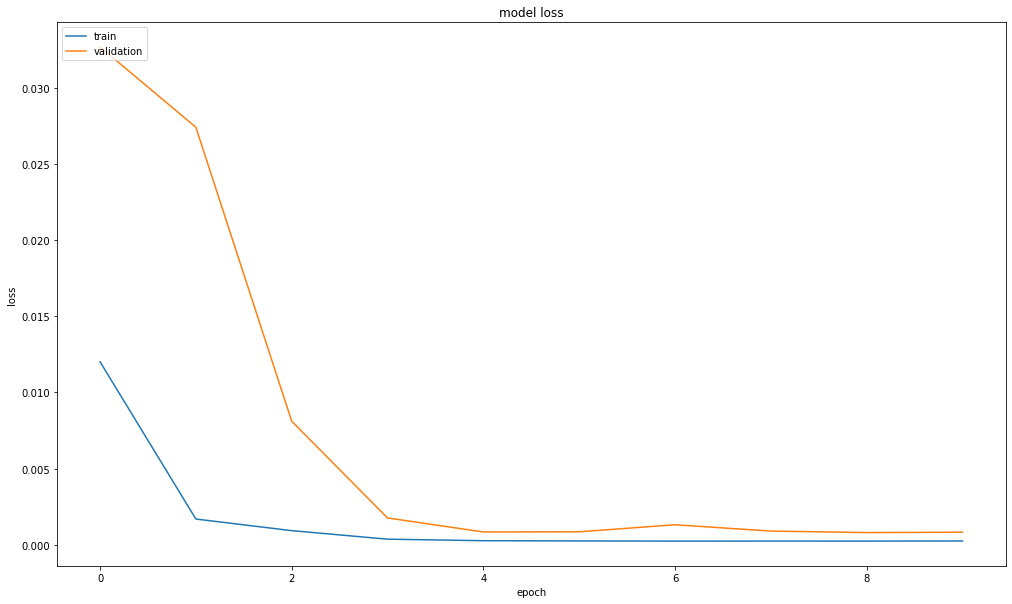

In [58]:
# Training the model
history1 = model3.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=64, verbose=1)

# Plot history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [59]:
# Finding train and test predictinos
train_predict_scaled = model3.predict(x_train)
val_predict_scaled = model3.predict(x_val)

# Reversing the scaling performed on the dataset
train_predict = scaler.inverse_transform(train_predict_scaled)
val_predict = scaler.inverse_transform(val_predict_scaled)

In [60]:
# Generating dataframe for plotting
df_plot = df_wip[['Adj Close', 'Date']]

# Add train predictions according to respective dates
df_plot["train_preds"] = np.nan
df_plot["train_preds"][time_step:len(train_data)] =  train_predict[:,0]

# Add x test data according to respective dates
df_plot["val_preds"] = np.nan
df_plot["val_preds"][len(train_data)+time_step:] = val_predict[:,0]

# Print and check
df_plot

,Adj Close,Date,train_preds,val_preds
0,7791.299805,2016-01-04,NaN,NaN
1,7784.649902,2016-01-05,NaN,NaN
2,7741.000000,2016-01-06,NaN,NaN
3,7568.299805,2016-01-07,NaN,NaN
4,7601.350098,2016-01-08,NaN,NaN
...,...,...,...,...
1476,17086.250000,2021-12-27,NaN,16934.031250
1477,17233.250000,2021-12-28,NaN,16914.697266
1478,17213.599609,2021-12-29,NaN,16908.878906
1479,17203.949219,2021-12-30,NaN,16911.875000


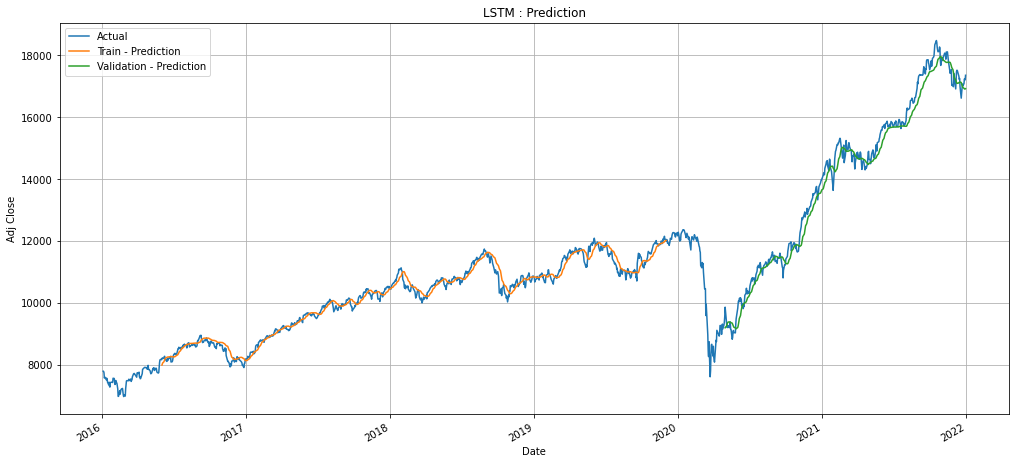

<Figure size 1224x720 with 0 Axes>

In [61]:
# Visualize the predictions
fig = plt.figure(figsize=(17,8))
ax = fig.add_subplot(111)
ax.set(title = 'LSTM : Prediction', xlabel = 'Date', ylabel = 'Adj Close')
ax.grid()
plt.plot(pd.to_datetime(df_plot['Date']), df_plot['Adj Close'], label='Actual')
plt.plot(pd.to_datetime(df_plot['Date']), df_plot['train_preds'], label='Train - Prediction')
plt.plot(pd.to_datetime(df_plot['Date']), df_plot['val_preds'], label='Validation - Prediction')
plt.gcf().autofmt_xdate()
plt.legend()
plt.show()
plt.tight_layout()

In [62]:
# Calculating training metrics
print("Training Metrics:")
df_train_metrics["Univariate_100_model3"]=calculate_metrics(df_plot["Adj Close"][time_step:len(train_data)], train_predict[:,0])

# Calculating validation metrics
print("Validation Metrics:")
df_val_metrics["Univariate_100_model3"]=calculate_metrics(df_plot["Adj Close"][len(train_data)+time_step:], val_predict[:,0])

Training Metrics:
MSE :  173.57103756371697
R2 Score :  0.9763746445345481
MAPE :  0.012907448844919771

Validation Metrics:
MSE :  330.18128218610644
R2 Score :  0.9842740815430286
MAPE :  0.01940789959710933



## Examining different model metrices

In [63]:
# metrices for trainng
df_train_metrics

,Multivariate,Univariate_100,Univariate_100_model2,Univariate_100_model3
MSE,203.308753,308.261097,468.473006,173.571038
R2,0.970713,0.932672,0.844502,0.976375
MAPE,0.015360,0.025259,0.040977,0.012907


In [64]:
# metrices for validation
df_val_metrics

,Multivariate,Univariate_100,Univariate_100_model2,Univariate_100_model3
MSE,1213.667815,1778.067776,2125.830826,330.181282
R2,0.662367,0.275328,-0.035863,0.984274
MAPE,0.062500,0.092067,0.111319,0.019408


## Keras Tuner for Hyperparameter tuning

In [207]:
import os
import keras_tuner as kt
from keras_tuner import RandomSearch, BayesianOptimization

In [211]:
# Create a function to define model space search
def build_model(hp):
    
    model = Sequential()
    model.add(LSTM(hp.Int('input_unit',min_value=32,max_value=512,step=32),return_sequences=True, input_shape=(x_train.shape[1], 1)))
    
    for i in range(hp.Int('lstm_layers', 0, 4)):
        model.add(LSTM(hp.Int('lstm_units',min_value=32,max_value=128,step=32),return_sequences=True))
        
    model.add(LSTM(hp.Int('final_lstm_units',min_value=32,max_value=128,step=32),return_sequences=False))
    
    for i in range(hp.Int('dense_layers', 0, 4)):
        model.add(Dense(units=hp.Int('dense_units', min_value=32, max_value=128, step=32)))
    
    model.add(Dropout(hp.Float('Dropout_rate',min_value=0, max_value=0.5, step=0.1)))
    model.add(Dense(1))
    
    model.compile(loss='mean_squared_error', optimizer='adam', metrics = 'mean_squared_error')
    
    return model

In [212]:
# Creating randomsearch object
tuner= BayesianOptimization(
        build_model,
        objective='mean_squared_error',
        max_trials=50,
        num_initial_points=25
        )

INFO:tensorflow:Reloading Oracle from existing project .\untitled_project\oracle.json
INFO:tensorflow:Reloading Tuner from .\untitled_project\tuner0.json


In [225]:
# Get summary of tuner space
tuner.search_space_summary()

Search space summary
Default search space size: 7
input_unit (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 32, 'sampling': None}
lstm_layers (Int)
{'default': None, 'conditions': [], 'min_value': 0, 'max_value': 4, 'step': 1, 'sampling': None}
final_lstm_units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 32, 'sampling': None}
dense_layers (Int)
{'default': None, 'conditions': [], 'min_value': 0, 'max_value': 4, 'step': 1, 'sampling': None}
Dropout_rate (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.1, 'sampling': None}
lstm_units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 32, 'sampling': None}
dense_units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 32, 'sampling': None}


In [213]:
# Search best parameter
tuner.search(x_train,y_train,epochs=10,validation_data=(x_val,y_val))

Trial 46 Complete [00h 00m 30s]
mean_squared_error: 0.00023626959591638297

Best mean_squared_error So Far: 0.00018503263709135354
Total elapsed time: 01h 12m 57s
INFO:tensorflow:Oracle triggered exit


In [214]:
# Return the best model from tuner
best_model = tuner.get_best_models(num_models=1)[0]

# Summary of the best model generated by tuner
best_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 96)           37632     
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               115200    
_________________________________________________________________
dense (Dense)                (None, 128)               16512     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

In [224]:
# Getting the tuned hyperparameters
best_parameters = tuner.get_best_hyperparameters(1)[0]

# Print the tuned parameters
best_parameters.values

{'input_unit': 96,
 'lstm_layers': 0,
 'final_lstm_units': 128,
 'dense_layers': 4,
 'Dropout_rate': 0.0,
 'lstm_units': 128,
 'dense_units': 128}

Epoch 1/15
14/14 [==============================] - 9s 471ms/step - loss: 2.0528e-04 - mean_squared_error: 2.0528e-04 - val_loss: 4.6817e-04 - val_mean_squared_error: 4.6817e-04
Epoch 2/15
14/14 [==============================] - 6s 433ms/step - loss: 1.8154e-04 - mean_squared_error: 1.8154e-04 - val_loss: 4.7009e-04 - val_mean_squared_error: 4.7009e-04
Epoch 3/15
14/14 [==============================] - 6s 430ms/step - loss: 1.9508e-04 - mean_squared_error: 1.9508e-04 - val_loss: 6.2044e-04 - val_mean_squared_error: 6.2044e-04
Epoch 4/15
14/14 [==============================] - 6s 430ms/step - loss: 1.6389e-04 - mean_squared_error: 1.6389e-04 - val_loss: 4.5801e-04 - val_mean_squared_error: 4.5801e-04
Epoch 5/15
14/14 [==============================] - 6s 448ms/step - loss: 1.6401e-04 - mean_squared_error: 1.6401e-04 - val_loss: 5.4806e-04 - val_mean_squared_error: 5.4806e-04
Epoch 6/15
14/14 [==============================] - 6s 449ms/step - loss: 1.5964e-04 - mean_squared_error: 1.5

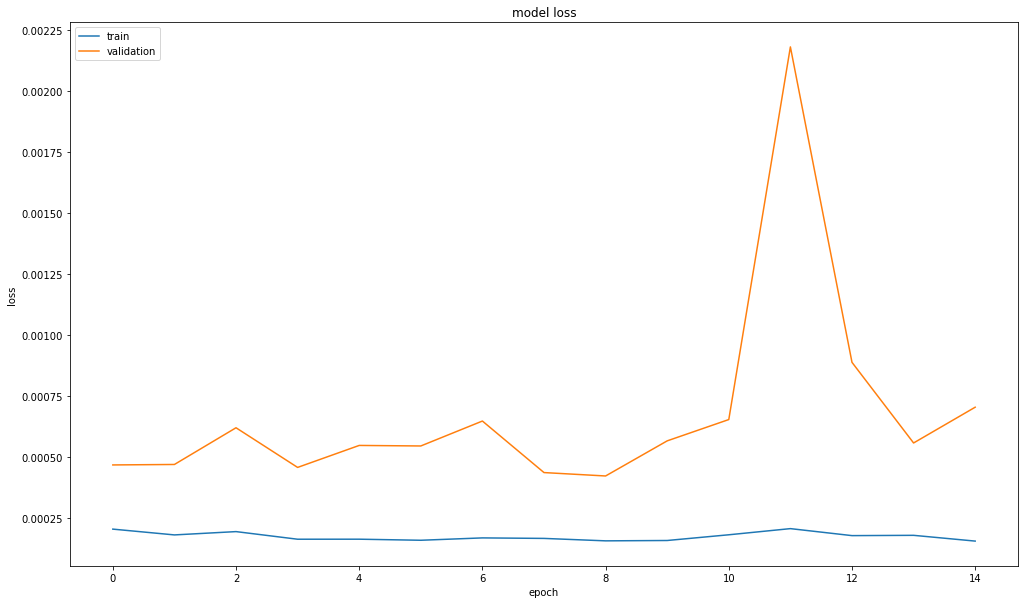

In [216]:
# Training the model with the best model from tuner
history1 = best_model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=15, batch_size=64, verbose=1)

# Plot history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [218]:
# Finding train and test predictinos
train_predict_scaled = best_model.predict(x_train)
val_predict_scaled = best_model.predict(x_val)

# Reversing the scaling performed on the dataset
train_predict = scaler.inverse_transform(train_predict_scaled)
val_predict = scaler.inverse_transform(val_predict_scaled)

# Generating dataframe for plotting
df_plot = df_wip[['Adj Close', 'Date']]

# Add train predictions according to respective dates
df_plot["train_preds"] = np.nan
df_plot["train_preds"][time_step:len(train_data)] =  train_predict[:,0]

# Add x test data according to respective dates
df_plot["val_preds"] = np.nan
df_plot["val_preds"][len(train_data)+time_step:] = val_predict[:,0]

# Print and check
df_plot

,Adj Close,Date,train_preds,val_preds
0,7791.299805,2016-01-04,NaN,NaN
1,7784.649902,2016-01-05,NaN,NaN
2,7741.000000,2016-01-06,NaN,NaN
3,7568.299805,2016-01-07,NaN,NaN
4,7601.350098,2016-01-08,NaN,NaN
...,...,...,...,...
1476,17086.250000,2021-12-27,NaN,16703.476562
1477,17233.250000,2021-12-28,NaN,16708.732422
1478,17213.599609,2021-12-29,NaN,16741.964844
1479,17203.949219,2021-12-30,NaN,16783.792969


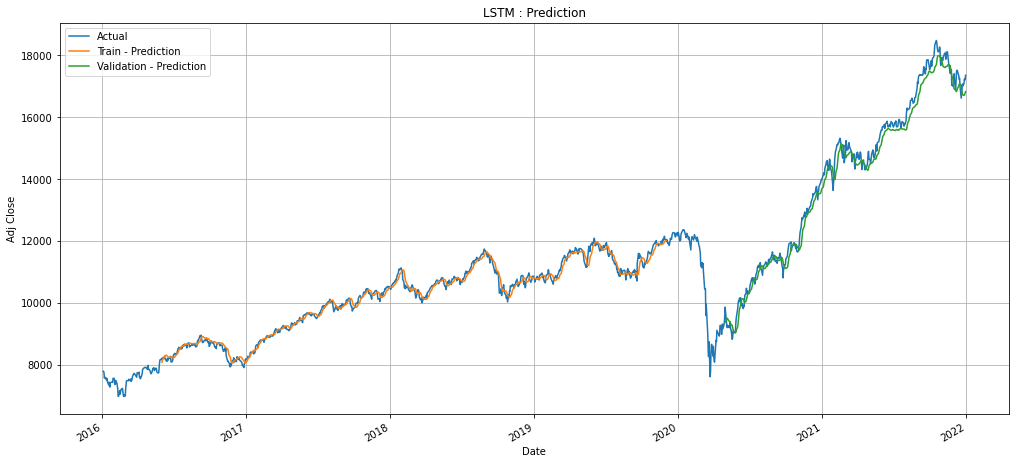

<Figure size 1224x720 with 0 Axes>

In [219]:
# Visualize the predictions
fig = plt.figure(figsize=(17,8))
ax = fig.add_subplot(111)
ax.set(title = 'LSTM : Prediction', xlabel = 'Date', ylabel = 'Adj Close')
ax.grid()
plt.plot(pd.to_datetime(df_plot['Date']), df_plot['Adj Close'], label='Actual')
plt.plot(pd.to_datetime(df_plot['Date']), df_plot['train_preds'], label='Train - Prediction')
plt.plot(pd.to_datetime(df_plot['Date']), df_plot['val_preds'], label='Validation - Prediction')
plt.gcf().autofmt_xdate()
plt.legend()
plt.show()
plt.tight_layout()

In [220]:
# Calculating training metrics
print("Training Metrics:")
df_train_metrics["tuner_model"]=calculate_metrics(df_plot["Adj Close"][time_step:len(train_data)], train_predict[:,0])

# Calculating validation metrics
print("Validation Metrics:")
df_val_metrics["tuner_model"]=calculate_metrics(df_plot["Adj Close"][len(train_data)+time_step:], val_predict[:,0])

Training Metrics:
MSE :  136.69234578556487
R2 Score :  0.9853474832843628
MAPE :  0.010330124702836785

Validation Metrics:
MSE :  305.4368559616317
R2 Score :  0.9865428218646073
MAPE :  0.018049184418485808



In [221]:
# metrices for trainng
df_train_metrics

,Multivariate,Univariate_100,Univariate_100_model2,Univariate_100_model3,tuner_model
MSE,203.308753,308.261097,468.473006,173.571038,136.692346
R2,0.970713,0.932672,0.844502,0.976375,0.985347
MAPE,0.015360,0.025259,0.040977,0.012907,0.010330


In [222]:
# metrices for trainng
df_val_metrics

,Multivariate,Univariate_100,Univariate_100_model2,Univariate_100_model3,tuner_model
MSE,1213.667815,1778.067776,2125.830826,330.181282,305.436856
R2,0.662367,0.275328,-0.035863,0.984274,0.986543
MAPE,0.062500,0.092067,0.111319,0.019408,0.018049


## KEY TAKE-AWAY
    1. We can see that tuner gave the best performing model so far.
    2. Through initial tuning we found out that that 2 layers of LSTM along with Dropout=0 gives best performance
    3. Furthur fine tune the model with second llevel of tuning.

## Second level of tuning

In [236]:
# Create a function to define model space search
def build_model(hp):
    
    model = Sequential()
    
    model.add(LSTM(hp.Int('input_unit',min_value=32,max_value=128,step=16),return_sequences=True, input_shape=(x_train.shape[1], 1)))
        
    model.add(LSTM(hp.Int('final_lstm_units',min_value=32,max_value=516,step=16),return_sequences=False))
    
    for i in range(hp.Int('dense_layer_1', 0, 10)):
        model.add(Dense(units=hp.Int('dense_units_1', min_value=32, max_value=512, step=32)))
        
    model.add(Dense(1))
    
    model.compile(loss='mean_squared_error', optimizer='adam', metrics = 'mean_squared_error')
    
    return model

In [238]:
# Creating randomsearch object
tuner= BayesianOptimization(
        build_model,
        objective='mean_squared_error',
        max_trials=30,
        num_initial_points=15
        )

# Get summary of tuner space
tuner.search_space_summary()

Search space summary
Default search space size: 3
input_unit (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 16, 'sampling': None}
final_lstm_units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 516, 'step': 16, 'sampling': None}
dense_layer_1 (Int)
{'default': None, 'conditions': [], 'min_value': 0, 'max_value': 10, 'step': 1, 'sampling': None}


In [239]:
# Search best parameter
tuner.search(x_train,y_train,epochs=10,validation_data=(x_val,y_val))

Trial 30 Complete [00h 06m 20s]
mean_squared_error: 0.0001331027742708102

Best mean_squared_error So Far: 0.0001331027742708102
Total elapsed time: 02h 03m 32s
INFO:tensorflow:Oracle triggered exit


In [240]:
# Return the best model from tuner
best_model = tuner.get_best_models(num_models=1)[0]

# Summary of the best model generated by tuner
best_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 128)          66560     
_________________________________________________________________
lstm_1 (LSTM)                (None, 512)               1312768   
_________________________________________________________________
dense (Dense)                (None, 512)               262656    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_4 (Dense)              (None, 512)               2

In [241]:
# Getting the tuned hyperparameters
best_parameters = tuner.get_best_hyperparameters(1)[0]

# Print the tuned parameters
best_parameters.values

{'input_unit': 128,
 'final_lstm_units': 512,
 'dense_layer_1': 10,
 'dense_units_1': 512}

Epoch 1/25
27/27 [==============================] - 38s 1s/step - loss: 1.3535e-04 - mean_squared_error: 1.3535e-04 - val_loss: 5.6264e-04 - val_mean_squared_error: 5.6264e-04

Epoch 00001: loss improved from inf to 0.00014, saving model to best_model.h5
Epoch 2/25
27/27 [==============================] - 38s 1s/step - loss: 1.5305e-04 - mean_squared_error: 1.5305e-04 - val_loss: 5.3116e-04 - val_mean_squared_error: 5.3116e-04

Epoch 00002: loss did not improve from 0.00014
Epoch 3/25
27/27 [==============================] - 37s 1s/step - loss: 1.3384e-04 - mean_squared_error: 1.3384e-04 - val_loss: 3.0613e-04 - val_mean_squared_error: 3.0613e-04

Epoch 00003: loss improved from 0.00014 to 0.00013, saving model to best_model.h5
Epoch 4/25
27/27 [==============================] - 36s 1s/step - loss: 1.8825e-04 - mean_squared_error: 1.8825e-04 - val_loss: 0.0021 - val_mean_squared_error: 0.0021

Epoch 00004: loss did not improve from 0.00013
Epoch 5/25
27/27 [============================

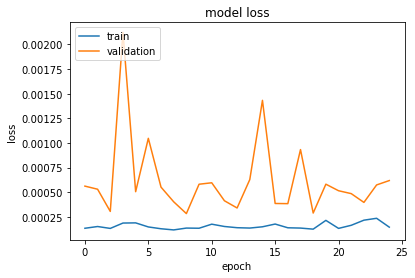

In [256]:
# Define the checkpoint to save the best model derived during the training
filepath = "best_model.h5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

# Training the model with the best model from tuner
history1 = best_model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=25, batch_size=32, verbose=1, callbacks=callbacks_list)

# Plot history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [257]:
# Loading the saved best model derived during training
tuner_best_model = load_model(filepath)

# Finding train and test predictinos
train_predict_scaled = tuner_best_model.predict(x_train)
val_predict_scaled = tuner_best_model.predict(x_val)

# Reversing the scaling performed on the dataset
train_predict = scaler.inverse_transform(train_predict_scaled)
val_predict = scaler.inverse_transform(val_predict_scaled)

# Generating dataframe for plotting
df_plot = df_wip[['Adj Close', 'Date']]

# Add train predictions according to respective dates
df_plot["train_preds"] = np.nan
df_plot["train_preds"][time_step:len(train_data)] =  train_predict[:,0]

# Add x test data according to respective dates
df_plot["val_preds"] = np.nan
df_plot["val_preds"][len(train_data)+time_step:] = val_predict[:,0]

# Print and check
df_plot

,Adj Close,Date,train_preds,val_preds
0,7791.299805,2016-01-04,NaN,NaN
1,7784.649902,2016-01-05,NaN,NaN
2,7741.000000,2016-01-06,NaN,NaN
3,7568.299805,2016-01-07,NaN,NaN
4,7601.350098,2016-01-08,NaN,NaN
...,...,...,...,...
1476,17086.250000,2021-12-27,NaN,16767.982422
1477,17233.250000,2021-12-28,NaN,16861.259766
1478,17213.599609,2021-12-29,NaN,16967.212891
1479,17203.949219,2021-12-30,NaN,17048.500000


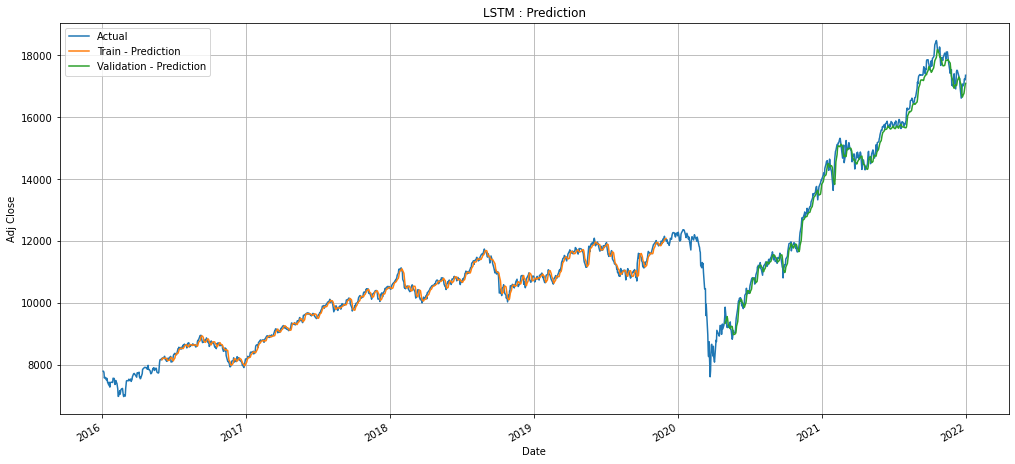

<Figure size 432x288 with 0 Axes>

In [258]:
# Visualize the predictions
fig = plt.figure(figsize=(17,8))
ax = fig.add_subplot(111)
ax.set(title = 'LSTM : Prediction', xlabel = 'Date', ylabel = 'Adj Close')
ax.grid()
plt.plot(pd.to_datetime(df_plot['Date']), df_plot['Adj Close'], label='Actual')
plt.plot(pd.to_datetime(df_plot['Date']), df_plot['train_preds'], label='Train - Prediction')
plt.plot(pd.to_datetime(df_plot['Date']), df_plot['val_preds'], label='Validation - Prediction')
plt.gcf().autofmt_xdate()
plt.legend()
plt.show()
plt.tight_layout()

In [259]:
# Calculating training metrics
print("Training Metrics:")
df_train_metrics["tuner_best_model"]=calculate_metrics(df_plot["Adj Close"][time_step:len(train_data)], train_predict[:,0])

# Calculating validation metrics
print("Validation Metrics:")
df_val_metrics["tuner_best_model"]=calculate_metrics(df_plot["Adj Close"][len(train_data)+time_step:], val_predict[:,0])

Training Metrics:
MSE :  117.79159920932857
R2 Score :  0.9891194094249203
MAPE :  0.008806008746544585

Validation Metrics:
MSE :  231.18868764304855
R2 Score :  0.9922901792784339
MAPE :  0.013471590544223486



In [260]:
# metrices for trainng
df_train_metrics

,Multivariate,Univariate_100,Univariate_100_model2,Univariate_100_model3,tuner_model,tuner_model_2,tuner_best_model
MSE,203.308753,308.261097,468.473006,173.571038,136.692346,123.683910,117.791599
R2,0.970713,0.932672,0.844502,0.976375,0.985347,0.988004,0.989119
MAPE,0.015360,0.025259,0.040977,0.012907,0.010330,0.009167,0.008806


In [261]:
# metrices for trainng
df_val_metrics

,Multivariate,Univariate_100,Univariate_100_model2,Univariate_100_model3,tuner_model,tuner_model_2,tuner_best_model
MSE,1213.667815,1778.067776,2125.830826,330.181282,305.436856,268.890613,231.188688
R2,0.662367,0.275328,-0.035863,0.984274,0.986543,0.989571,0.992290
MAPE,0.062500,0.092067,0.111319,0.019408,0.018049,0.015576,0.013472


## KEY TAKE-AWAY
    1. We can see that model performance furthur increased from initial tuned model.
    2. The latest tuned model is taken for making predictions on 'Out of time data' and future predictions.

## Prediction for 'Out of Time Data'

In [263]:
# Import the out of time data set
df_out_time = pd.read_csv('NSE Out of Time Testing Data - 1st Jan 2022 to 4th Feb 2022.csv')

# Print and check
df_out_time

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,17387.150391,17646.650391,17383.300781,17625.699219,17625.699219,200500
1,2022-01-04,17681.400391,17827.599609,17593.550781,17805.250000,17805.250000,247400
2,2022-01-05,17820.099609,17944.699219,17748.849609,17925.250000,17925.250000,251500
3,2022-01-06,17768.500000,17797.949219,17655.550781,17745.900391,17745.900391,236500
4,2022-01-07,17797.599609,17905.000000,17704.550781,17812.699219,17812.699219,239300
5,2022-01-10,17913.300781,18017.449219,17879.150391,18003.300781,18003.300781,232400
6,2022-01-11,17997.750000,18081.250000,17964.400391,18055.750000,18055.750000,220200
7,2022-01-12,18170.400391,18227.949219,18128.800781,18212.349609,18212.349609,245000
8,2022-01-13,18257.000000,18272.250000,18163.800781,18257.800781,18257.800781,303700
9,2022-01-14,18185.000000,18286.949219,18119.650391,18255.750000,18255.750000,229500


In [264]:
# Finding number of entries in new data
new_len = len(df_out_time)
print("No. of new entries : ", len(df_out_time))

No. of new entries :  23


In [265]:
#checking for null values in new data
df_out_time.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [266]:
# Read the dataset
df = pd.read_csv('NSE Training Data - 1st Jan 2016 to 1st Jan 2022.csv')

# Print and check
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,7924.549805,7937.549805,7781.100098,7791.299805,7791.299805,134700.0
1,2016-01-05,7828.399902,7831.200195,7763.250000,7784.649902,7784.649902,145200.0
2,2016-01-06,7788.049805,7800.950195,7721.200195,7741.000000,7741.000000,147100.0
3,2016-01-07,7673.350098,7674.950195,7556.600098,7568.299805,7568.299805,188900.0
4,2016-01-08,7611.649902,7634.100098,7581.049805,7601.350098,7601.350098,157400.0
...,...,...,...,...,...,...,...
1476,2021-12-27,16937.750000,17112.050781,16833.199219,17086.250000,17086.250000,144800.0
1477,2021-12-28,17177.599609,17250.250000,17161.150391,17233.250000,17233.250000,176000.0
1478,2021-12-29,17220.099609,17285.949219,17176.650391,17213.599609,17213.599609,161700.0
1479,2021-12-30,17201.449219,17264.050781,17146.349609,17203.949219,17203.949219,320800.0


In [267]:
# Appending the new data to old data
df_out_wip = pd.concat([ df, df_out_time])

# Renumbering index
df_out_wip.reset_index(drop=True, inplace=True)

# Print and check
df_out_wip

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,7924.549805,7937.549805,7781.100098,7791.299805,7791.299805,134700.0
1,2016-01-05,7828.399902,7831.200195,7763.250000,7784.649902,7784.649902,145200.0
2,2016-01-06,7788.049805,7800.950195,7721.200195,7741.000000,7741.000000,147100.0
3,2016-01-07,7673.350098,7674.950195,7556.600098,7568.299805,7568.299805,188900.0
4,2016-01-08,7611.649902,7634.100098,7581.049805,7601.350098,7601.350098,157400.0
...,...,...,...,...,...,...,...
1499,2022-01-28,17208.300781,17373.500000,17077.099609,17101.949219,17101.949219,355300.0
1500,2022-01-31,17301.050781,17410.000000,17264.150391,17339.849609,17339.849609,321700.0
1501,2022-02-01,17529.449219,17622.400391,17244.550781,17576.849609,17576.849609,386400.0
1502,2022-02-02,17706.199219,17794.599609,17674.800781,17780.000000,17780.000000,271200.0


In [268]:
# Extracting the test data set
df_test = df_out_wip[-time_step-new_len:]

# Print and check
df_test

,Date,Open,High,Low,Close,Adj Close,Volume
1381,2021-08-09,16281.349609,16320.750000,16179.049805,16258.250000,16258.250000,240500.0
1382,2021-08-10,16274.799805,16359.250000,16202.250000,16280.099609,16280.099609,288000.0
1383,2021-08-11,16327.299805,16338.750000,16162.549805,16282.250000,16282.250000,277900.0
1384,2021-08-12,16303.650391,16375.500000,16286.900391,16364.400391,16364.400391,280200.0
1385,2021-08-13,16385.699219,16543.599609,16376.299805,16529.099609,16529.099609,321900.0
...,...,...,...,...,...,...,...
1499,2022-01-28,17208.300781,17373.500000,17077.099609,17101.949219,17101.949219,355300.0
1500,2022-01-31,17301.050781,17410.000000,17264.150391,17339.849609,17339.849609,321700.0
1501,2022-02-01,17529.449219,17622.400391,17244.550781,17576.849609,17576.849609,386400.0
1502,2022-02-02,17706.199219,17794.599609,17674.800781,17780.000000,17780.000000,271200.0


In [269]:
# Extracting the input dataset
df_input = df_test[['Adj Close']]

# Print and check
df_input

,Adj Close
1381,16258.250000
1382,16280.099609
1383,16282.250000
1384,16364.400391
1385,16529.099609
...,...
1499,17101.949219
1500,17339.849609
1501,17576.849609
1502,17780.000000


In [270]:
# Initializing the MinMaxScaler object with limits 0 to 1
scaler = MinMaxScaler(feature_range=(0,1))

# Scaling the data between 0 and 1
scaled_data = scaler.fit_transform(df_input)

# Define the timestep to consider
time_step = 100

# Generate test and train splits
x_test, y_test = create_dataset(scaled_data, time_step)

# Print the shape of train set
print("Shape of x_test : ", x_test.shape)
print("Shape of y_test : ", y_test.shape)

Shape of x_test :  (23, 100)
Shape of y_test :  (23,)


In [271]:
# Reshape input into shape --> [samples, time steps, features] which is required for LSTM
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)

# Print the shape of train set
print("Shape of x_test : ", x_test.shape)
print("Shape of y_test : ", y_test.shape)

Shape of x_test :  (23, 100, 1)
Shape of y_test :  (23,)


In [273]:
# Finding train and test predictinos
test_predict_scaled = tuner_best_model.predict(x_test)

# Reversing the scaling performed on the dataset
test_predict = scaler.inverse_transform(test_predict_scaled)

# Generating dataframe for plotting
df_plot = df_test[['Adj Close', 'Date']]

# Add test predictions according to respective dates
df_plot["test_preds"] = np.nan
df_plot["test_preds"][time_step:len(scaled_data)] =  test_predict[:,0]

# Print and check
df_plot

,Adj Close,Date,test_preds
1381,16258.250000,2021-08-09,NaN
1382,16280.099609,2021-08-10,NaN
1383,16282.250000,2021-08-11,NaN
1384,16364.400391,2021-08-12,NaN
1385,16529.099609,2021-08-13,NaN
...,...,...,...
1499,17101.949219,2022-01-28,17219.789062
1500,17339.849609,2022-01-31,17119.656250
1501,17576.849609,2022-02-01,17131.414062
1502,17780.000000,2022-02-02,17256.871094


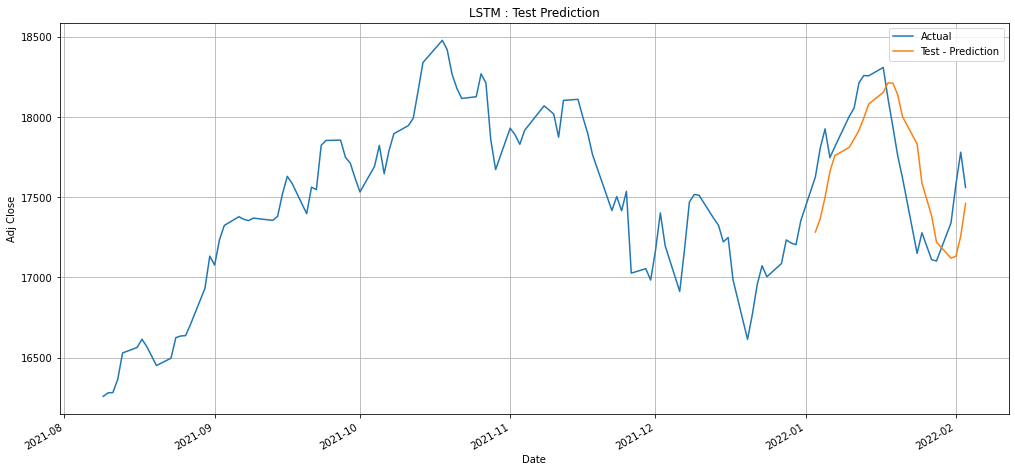

<Figure size 432x288 with 0 Axes>

In [274]:
# Visualize the predictions
fig = plt.figure(figsize=(17,8))
ax = fig.add_subplot(111)
ax.set(title = 'LSTM : Test Prediction', xlabel = 'Date', ylabel = 'Adj Close')
ax.grid()
plt.plot(pd.to_datetime(df_plot['Date']), df_plot['Adj Close'], label='Actual')
plt.plot(pd.to_datetime(df_plot['Date']), df_plot['test_preds'], label='Test - Prediction')
plt.gcf().autofmt_xdate()
plt.legend()
plt.show()
plt.tight_layout()

In [275]:
# Calculating metrics for the test predictions
print("Test Metrics:")
calculate_metrics(df_plot["Adj Close"][time_step:len(scaled_data)], test_predict[:,0])

Test Metrics:
MSE :  319.320473572827
R2 Score :  0.2392698655954386
MAPE :  0.015811903098248925



[319.320473572827, 0.2392698655954386, 0.015811903098248925]

In [276]:
# Extracting the required data
df_test_preds = df_plot[['Adj Close', 'test_preds']]
df_test_preds = df_test_preds[-23:]

# Renumbering index
df_test_preds.reset_index(drop=True, inplace=True)

# Save the test preds to .csv file
df_test_preds.to_csv('test_preds.csv')

# Print and check
df_test_preds

,Adj Close,test_preds
0,17625.699219,17282.476562
1,17805.250000,17366.285156
2,17925.250000,17499.669922
3,17745.900391,17658.451172
4,17812.699219,17758.175781
5,18003.300781,17810.558594
6,18055.750000,17862.294922
7,18212.349609,17915.806641
8,18257.800781,17993.195312
9,18255.750000,18079.523438


In [278]:
# Define a function to get the future predictions from the model
def future_preds(last_day, last_input, time_period):
    model_input = last_input
    time_step = 100
    preds=[]
    for i in range(time_period):
        # Getting corresponding dates
        tomorrow = last_day + timedelta(1)

        # Getting future predictions
        next_pred_scaled = tuner_best_model.predict(model_input)
        next_pred = scaler.inverse_transform(next_pred_scaled)
        preds.append([tomorrow.item().strftime('%Y-%m-%d'), next_pred.item()])
        model_input = np.roll(model_input, -1)
        model_input[0][time_step-1] = next_pred_scaled
        
        # Updating to next day
        last_day = tomorrow
        
    return preds

In [279]:
# Getting the last recorded day
given_day = pd.to_datetime(df_plot['Date'])[-1:]
given_day

# Getting the future predictions for the given time period
time_period=15

# Getting the predictions
preds = future_preds(given_day, x_test[-1:], time_period)

# Convert the prediction to a dataframe
df_future = pd.DataFrame(preds, columns=['Date', 'future_preds'])

# Save the test preds to .csv file
df_test_preds.to_csv('future_preds.csv')

# Print and check
df_future

,Date,future_preds
0,2022-02-04,17459.974609
1,2022-02-05,17588.402344
2,2022-02-06,17658.109375
3,2022-02-07,17685.949219
4,2022-02-08,17687.097656
5,2022-02-09,17673.873047
6,2022-02-10,17655.166016
7,2022-02-11,17636.570312
8,2022-02-12,17620.955078
9,2022-02-13,17609.232422


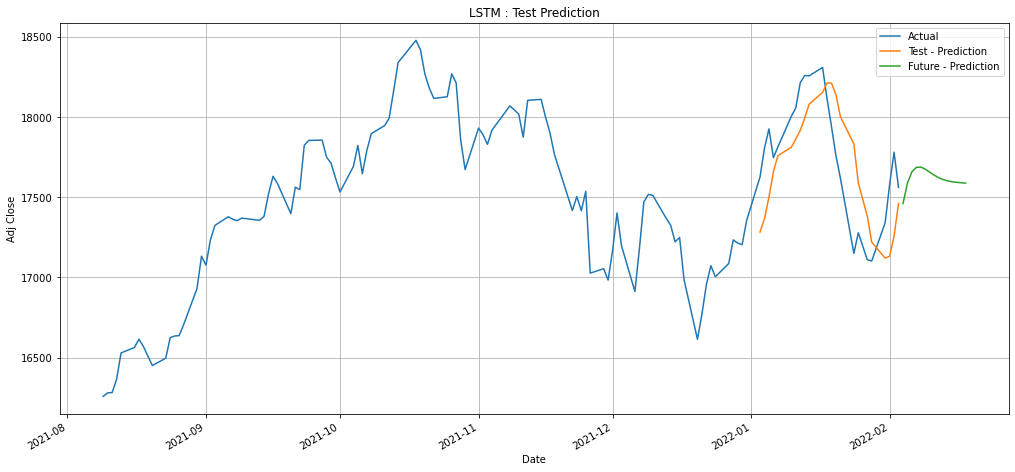

<Figure size 432x288 with 0 Axes>

In [280]:
# Visualize the predictions
fig = plt.figure(figsize=(17,8))
ax = fig.add_subplot(111)
ax.set(title = 'LSTM : Test Prediction', xlabel = 'Date', ylabel = 'Adj Close')
ax.grid()
plt.plot(pd.to_datetime(df_plot['Date']), df_plot['Adj Close'], label='Actual')
plt.plot(pd.to_datetime(df_plot['Date']), df_plot['test_preds'], label='Test - Prediction')
plt.plot(pd.to_datetime(df_future['Date']), df_future['future_preds'], label='Future - Prediction')
plt.gcf().autofmt_xdate()
plt.legend()
plt.show()
plt.tight_layout()